# **A1: Predicting Delays at Airports**
**By: Weikang Yang**  

---

**Assignment Description:**  
In this assignment, You will have to create a ML model to predict this year's prospects success.  


Airport Assigned: **FLL - Fort Lauderdale-Hollywood International Airport**

# **Part 2 EDA**

üß≠ Why Compare FLL with MIA Instead of the National Average?
In evaluating the departure delay performance of Fort Lauderdale‚ÄìHollywood International Airport (FLL), we deliberately chose to benchmark it against Miami International Airport (MIA)‚Äîrather than relying on the national average across all U.S. airports. This methodological decision is grounded in both operational relevance and statistical soundness:

1. **Geographic and Meteorological Parity**
- FLL and MIA are only ~21 miles (34 kilometers) apart, situated within the same South Florida air corridor. As such, they share:
    - Similar weather systems (humidity, tropical storm exposure),
    - Comparable airspace congestion levels,
    - Overlapping environmental and infrastructure constraints.  
This geographical proximity ensures a like-for-like comparison, avoiding distortions introduced by unrelated airports in dissimilar climates or traffic densities.

2. **Operational Complexity at Scale**  
- Averaging delay data across all U.S. airports blends together:
    - Major international hubs,

    - Regional terminals,

    - Low-traffic airfields.  

Such an aggregate metric is statistically diluted, failing to reflect the complexities of high-frequency, high-volume operations like those at FLL. In contrast, MIA functions as a high-capacity, complex hub‚Äîan appropriate benchmark for meaningful performance evaluation.

3. Strategic Substitution and Competitive Overlap
- From a commercial aviation strategy perspective:

    - FLL and MIA share overlapping catchment areas,

    - Some passenger segments (e.g., leisure, low-cost travelers) may shift between airports based on perceived reliability,

    - Airlines may route flights through one or the other depending on delay profiles and cost-efficiency.

Therefore, identifying structural discrepancies in delays between the two can help surface anomalies specific to FLL, inform carrier negotiations, and guide resource planning and service-level adjustments.

>üìå In sum, MIA serves not just as a nearby airport‚Äîbut as a high-fidelity baseline for contextualizing FLL‚Äôs delay behavior under similar market and operational conditions.

---

###  **2.1 FLL vs MIA Delay Rate Analysis (2023 & 2024 Combined)**
üîç Logic Summary:
- **Data Loading and Year Annotation**
  - Loaded raw flight data for 2023 and 2024 separately.
  - Added a `YEAR` column to each dataset to tag the corresponding year.

- **Dataset Merging**
  - Combined both years into a single DataFrame named `df_all`.
  - Labeled this merged dataset as `"2023_2024_all_data"` for reference.

- **Airport Filtering**
  - Filtered records where `ORIGIN` is either `FLL` or `MIA`, stored in `df_filtered_all`.

- **Date Processing**
  - Converted `FL_DATE` into `datetime` format for time-series operations.

- **Daily Delay Metrics Aggregation**
  - Grouped data by `FL_DATE` and `ORIGIN` to compute two key metrics:
    - `dep_delay_avg`: average departure delay time.
    - `dep_delay_rate`: proportion of flights delayed over 15 minutes.
  - Multiplied delay rate by 100 to convert it to percentage format.

- **Visualization**
  - Used Seaborn to draw a daily line plot comparing delay rates of `FLL` vs `MIA`.
  - Customized plot with colors (FLL: red, MIA: blue), title, and rotated x-axis labels.

> ‚úÖ This code provides a side-by-side visual comparison of FLL and MIA departure delay rates across 2023 and 2024, supporting structural delay diagnosis at the regional level.


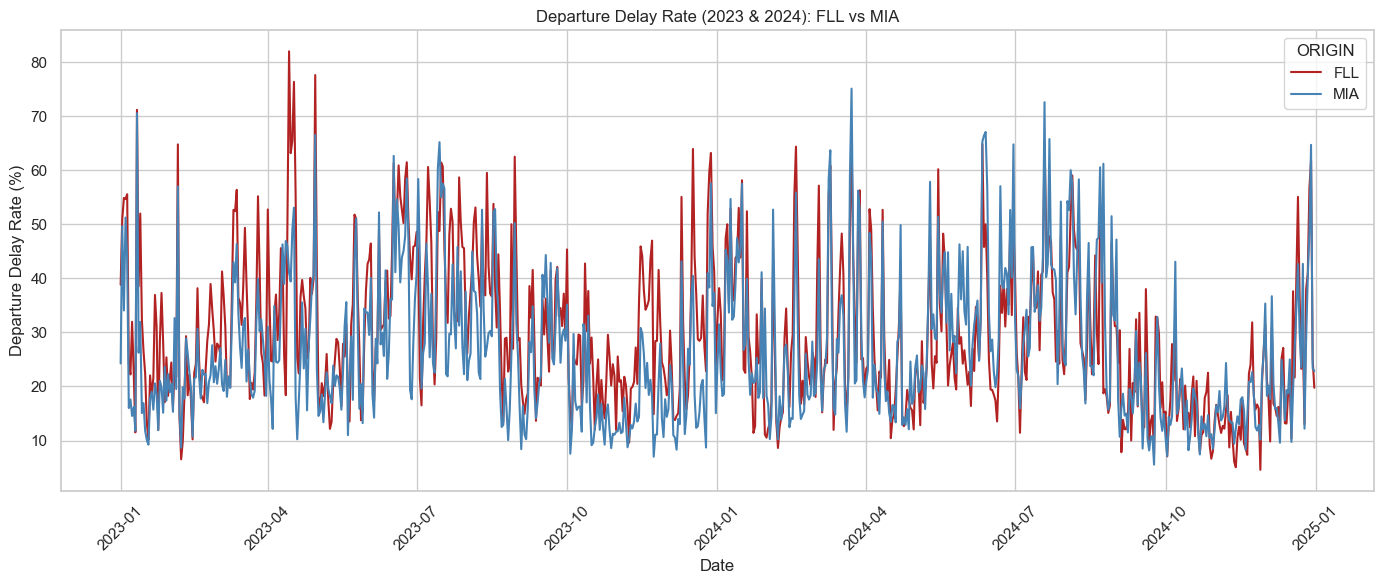

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Âä†ËΩΩ 2023 Âíå 2024 Âπ¥Êï∞ÊçÆÔºàÊ≥®ÊÑèÔºöÁî®Êà∑ÊèêÈÜíËßÑËåÉÂëΩÂêç‰∏∫ÂéüÂßãÊñá‰ª∂ÂêçÔºâ
df_2023 = pd.read_csv("2023_data.csv")  # ÂÆûÈôÖÂ∫î‰∏∫ 2023_data.csv
df_2024 = pd.read_csv("2024_data.csv")  # ÂÆûÈôÖÂ∫î‰∏∫ 2024_data.csv

# Ê∑ªÂä†Âπ¥‰ªΩÊ†áËØÜÂàóÔºåÊñπ‰æøÂêéÁª≠ÂàÜÊûê
df_2023["YEAR"] = 2023
df_2024["YEAR"] = 2024

# ÂêàÂπ∂‰∏∫‰∏Ä‰∏™ÊÄªÊï∞ÊçÆÈõÜ
df_all = pd.concat([df_2023, df_2024], ignore_index=True)

# ÂëΩÂêç‰∏∫ 2023_2024_all_data
df_all.name = "2023_2024_all_data"

# Á≠õÈÄâ FLL ‰∏é MIA ÁöÑËà™Áè≠
df_filtered_all = df_all[df_all["ORIGIN"].isin(["FLL", "MIA"])].copy()
df_filtered_all["FL_DATE"] = pd.to_datetime(df_filtered_all["FL_DATE"])

# ÊåâÂ§©ÂíåÊú∫Âú∫ËÅöÂêàÂª∂ËØØÁéá‰∏éÂπ≥ÂùáÂª∂ËØØÊó∂Èó¥
daily_stats_all = (
    df_filtered_all.groupby(["FL_DATE", "ORIGIN"])
    .agg(
        dep_delay_avg=("DEP_DELAY", "mean"),
        dep_delay_rate=("DEP_DEL15", "mean")
    )
    .reset_index()
)
daily_stats_all["dep_delay_rate"] *= 100  # ÁôæÂàÜÊØîÊòæÁ§∫

# ÁîªÂõæÔºö‰∏§Âπ¥ÂêàÂπ∂ÁöÑÂª∂ËØØÁéáÂØπÊØî
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=daily_stats_all,
    x="FL_DATE",
    y="dep_delay_rate",
    hue="ORIGIN",
    palette={"FLL": "firebrick", "MIA": "steelblue"}
)
plt.title("Departure Delay Rate (2023 & 2024): FLL vs MIA")
plt.ylabel("Departure Delay Rate (%)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Delays fluctuate wildly (high frequency of ups and downs)
The daily delay rate ranges from 10% to over 80%, with greater fluctuations in spring and summer.

High volatility may be related to:

Local severe weather events (such as hurricane season)

Peak holidays (Spring Break, summer travel, Thanksgiving)

Flight density and resource constraints, etc.

2. FLL vs. MIA: Overall delay levels are similar, but local differences are significant
MIA has higher delay rates during certain periods, possibly due to its larger hub size and stronger flight scheduling pressure.

FLL is more prone to extreme high delay peaks (reaching as high as 70‚Äì80% on certain days), possibly due to greater sensitivity to extreme weather conditions.

3. Seasonal trends are gradually emerging
Significant fluctuations occur around summer (June‚ÄìAugust) and winter holidays (November‚ÄìDecember) each year

It is recommended to conduct monthly or quarterly aggregated analyses in the future to more clearly capture seasonal patterns.


## **2.2 FLL vs MIA Comparison of reasons for flight cancellations**

Now let's take a look at whether there is a significant difference between the two airports in terms of the reasons for flight cancellations.

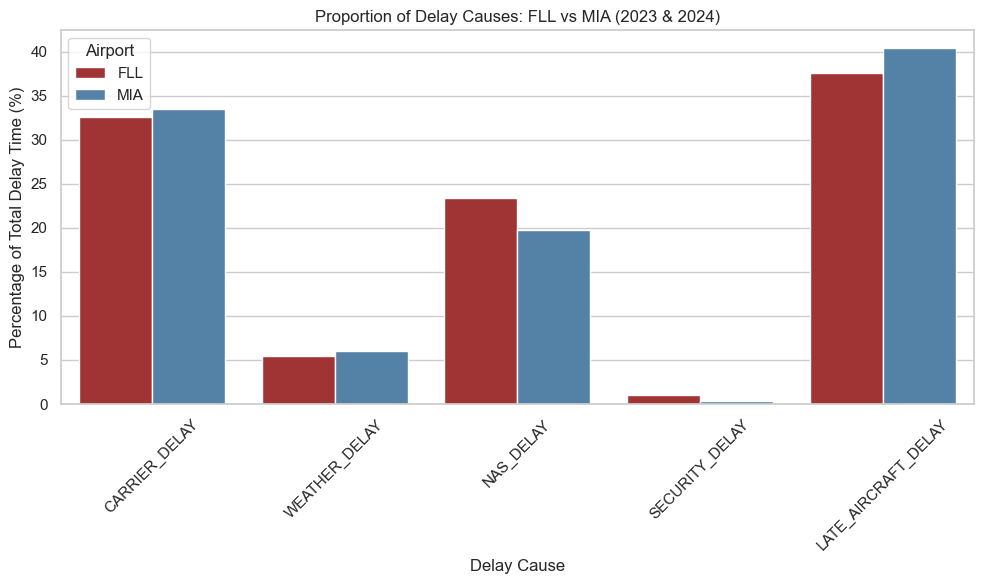

In [4]:
# Step 1: ‰ΩøÁî®ÂêàÂπ∂ÂêéÁöÑÊï∞ÊçÆÈõÜ df_allÔºàÂç≥ 2023_2024_all_dataÔºâ
# Á≠õÈÄâ ORIGIN ‰∏∫ FLL Âíå MIA ÁöÑËà™Áè≠
df_cause = df_all[df_all["ORIGIN"].isin(["FLL", "MIA"])].copy()

# Á°Æ‰øùÂª∂ËØØÂéüÂõ†ÂàóÂ≠òÂú®ÔºåÂèñËøô‰∫î‰∏™Âª∂ËØØÊó∂Èó¥Âàó
delay_causes = [
    "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"
]

# Step 2: ÊûÑÂª∫ÊØè‰∏™Êú∫Âú∫„ÄÅÊØèÁßçÂª∂ËØØÁ±ªÂûãÁöÑÊÄªÂàÜÈíüÊï∞
cause_sum = (
    df_cause.groupby("ORIGIN")[delay_causes]
    .sum()
    .T  # ËΩ¨ÁΩÆÔºåÊñπ‰æøÂêéÁª≠Â†ÜÂè†ÊàñÂπ∂ÊéíÊù°ÂΩ¢ÂõæÂ§ÑÁêÜ
)

# Step 3: ËΩ¨Êç¢‰∏∫Âç†ÊØî
cause_percent = cause_sum.div(cause_sum.sum(axis=0), axis=1) * 100
cause_percent = cause_percent.reset_index().rename(columns={"index": "Cause"})

# Step 4: Melt ÁªìÊûÑÔºåÈÄÇÂêà seaborn cluster bar chart
df_melt = cause_percent.melt(id_vars="Cause", var_name="Airport", value_name="Percentage")

# Step 5: ÁªòÂõæ
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melt,
    x="Cause",
    y="Percentage",
    hue="Airport",
    palette={"FLL": "firebrick", "MIA": "steelblue"}
)
plt.title("Proportion of Delay Causes: FLL vs MIA (2023 & 2024)")
plt.ylabel("Percentage of Total Delay Time (%)")
plt.xlabel("Delay Cause")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


| Delay Reasons                | FLL Percentage  | MIA Percentage  | Analysis and Insights                                     |
| ------------------- | ------- | ------- | ----------------------------------------- |
| **CARRIER\_DELAY**  | \~32.5% | \~33.5% | Both airports show similar performance in delays caused by airline operations, indicating that scheduling process efficiency and boarding preparation quality need to be optimized together |
| **WEATHER\_DELAY**  | \~5.5%  | \~6%    | Low proportion, as South Florida has relatively mild weather year-round; it is recommended to maintain the current meteorological warning system. |
| **NAS\_DELAY**      | \~23%   | \~20%   | FLL is slightly higher, possibly reflecting greater pressure in airspace allocation or ground traffic. Exploring optimizations to taxiways or scheduling systems is recommended. |
| **SECURITY\_DELAY** | \~1%    | Nearly 0%   | Overall extremely low, indicating an efficient security screening system that should be maintained. |
| **LATE_AIRCRAFT**  | \~37.5% | \~40.5% | MIA slightly higher, indicating frequent late arrivals, possibly due to a complex route network causing more pronounced ‚Äúchain delays‚Äù   |

- **‚úà Strategic Insights and Recommendations**
    - üõ´ For FLL Airport:  
        NAS delays are slightly higher; optimization can be achieved by adjusting tower scheduling and peak-hour passenger flow management strategies;  

    - Delay types are evenly distributed, indicating good operational stability, making it a suitable pilot airport for delay mitigation initiatives.  


## **2.3 FLL vs MIA Airport Passenger Traffic Comparison**

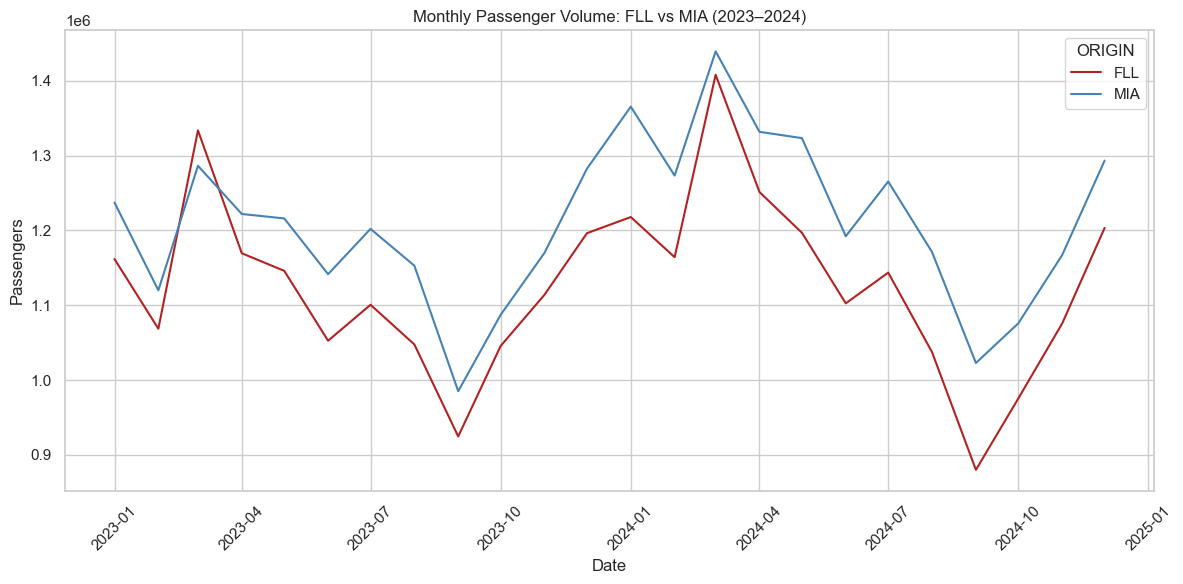

In [5]:
# ËØªÂèñ T100 Êï∞ÊçÆÁ§∫‰æãÔºàÂÆûÈôÖÂ∫î‰∏∫ T100.csvÔºâ
t100_path = "T100.csv"  # ÂÆûÈôÖÂ∫î‰∏∫ T100.csv
t100_df = pd.read_csv(t100_path)

# Á≠õÈÄâÂá∫ ORIGIN ‰∏∫ FLL Êàñ MIAÔºåÂπ¥‰ªΩ‰∏∫ 2023 Êàñ 2024
t100_filtered = t100_df[
    (t100_df["ORIGIN"].isin(["FLL", "MIA"])) &
    (t100_df["YEAR"].isin([2023, 2024]))
]

# ÊåâÊúàÁªüËÆ°ÊØè‰∏™Êú∫Âú∫ÁöÑ‰πòÂÆ¢Èáè
t100_monthly = (
    t100_filtered
    .groupby(["YEAR", "MONTH", "ORIGIN"])["PASSENGERS"]
    .sum()
    .reset_index()
)

# ÂàõÂª∫Áªü‰∏ÄÊó∂Èó¥Â≠óÊÆµÊñπ‰æøÂèØËßÜÂåñ
t100_monthly["DATE"] = pd.to_datetime(t100_monthly["YEAR"].astype(str) + "-" + t100_monthly["MONTH"].astype(str) + "-01")

# ÁªòÂõæ
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=t100_monthly,
    x="DATE",
    y="PASSENGERS",
    hue="ORIGIN",
    palette={"FLL": "firebrick", "MIA": "steelblue"}
)
plt.title("Monthly Passenger Volume: FLL vs MIA (2023‚Äì2024)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


| Time period                 | Feature summary                                          |
| ------------------- | --------------------------------------------- |
| **Overall trend**            | Passenger traffic at both airports shows highly similar **seasonal fluctuation patterns**, including fluctuations at the beginning of the year, a slight decline in the middle of the year, and an increase at the end of the year |
| **March 2023 and March 2024** | Both airports reached significant peaks at the same time (possibly corresponding to the spring peak travel season)                      |
| **March‚ÄìMay 2024**      | FLL and MIA both reached their highest monthly passenger volume peaks simultaneously (FLL at approximately 1.41 million, MIA at approximately 1.45 million)      |
| **September‚ÄìOctober 2024**     | FLL experienced a significant trough in October 2024 (below 900,000), while MIA saw a relatively moderate decline         |

1. FLL and MIA are comparable in terms of total passenger volume
    - FLL maintains an average monthly passenger volume of 1.05‚Äì1.3 million

    - MIA has a slightly higher average monthly passenger volume of 1.15‚Äì1.35 million

    - ‚úÖ The gap is stable and manageable, solidifying FLL's position as the second-largest regional hub

2. Both airports exhibit synchronized seasonal trends
    - High overlap indicates that the two airports share significant commonalities in service areas and demand structures (e.g., spring break, winter break, holiday travel)

    - Joint analysis of delay data and passenger peak overlap can be used for scheduling optimization

3. FLL performs exceptionally well in certain months
    - For example, in March 2023 and March 2024, FLL‚Äôs traffic even temporarily surpassed MIA‚Äôs, demonstrating its strong competitiveness during specific flight seasons

    - This can be used to assess whether specific marketing campaigns or airline strategies have brought passenger flow advantages.  

- üéØ Strategic Insights  
    - If FLL can further alleviate delay issues (especially the high proportion of NAS delays), it may be able to secure more high-density routes without adding new runways.

    - For peak periods (March and December), operational resources such as retail, parking, and boarding gates should be pre-deployed to enhance non-aviation revenue and customer satisfaction.

    - The mutual substitution effect between MIA and FLL underscores the need for differentiated positioning in fare strategies and service convenience.

## **2.4 FLL Operating Pressure Analysis**

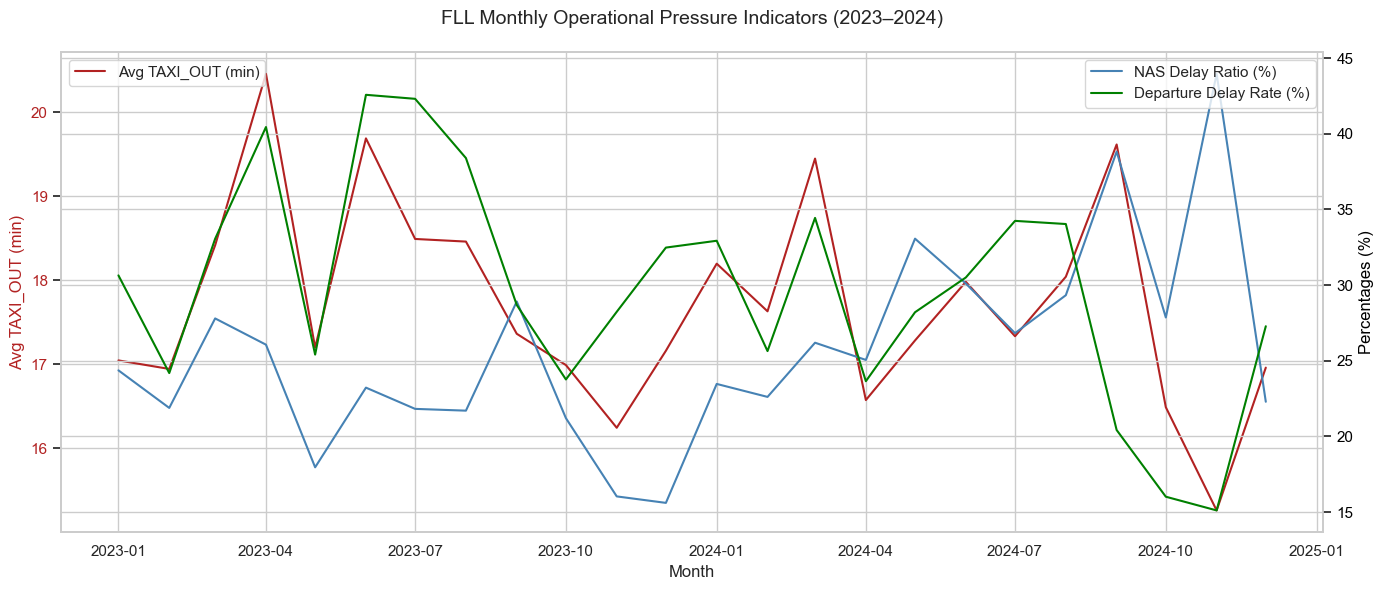

In [6]:
# ‰ΩøÁî®ÂêàÂπ∂ÂêéÁöÑÊï∞ÊçÆÈõÜ df_allÔºàÂç≥ 2023_2024_all_dataÔºâ
# Á≠õÈÄâÂá∫ ORIGIN ‰∏∫ FLL ÁöÑËà™Áè≠ÔºåÂπ∂ÊéíÈô§ÂèñÊ∂à‰∏éÊîπÈÅìËà™Áè≠
fll_df = df_all[
    (df_all["ORIGIN"] == "FLL") &
    (df_all["CANCELLED"] != 1) &
    (df_all["DIVERTED"] != 1)
].copy()

# Á°Æ‰øùÊó•ÊúüÊ†ºÂºèÊ≠£Á°Æ
fll_df["FL_DATE"] = pd.to_datetime(fll_df["FL_DATE"])

# ÊåâÊúàËÅöÂêàÔºöËÆ°ÁÆóÊØèÊúà TAXI_OUT ÂùáÂÄº„ÄÅDEP_DEL15 Âª∂ËØØÁéá„ÄÅNAS_DELAY Âç†ÊÄªÂª∂ËØØÊó∂Èó¥ÁöÑÊØî‰æã
monthly_summary = (
    fll_df.groupby([fll_df["FL_DATE"].dt.to_period("M")])
    .agg(
        avg_taxi_out=("TAXI_OUT", "mean"),
        delay_rate=("DEP_DEL15", "mean"),
        total_delay=("DEP_DELAY", "sum"),
        nas_delay=("NAS_DELAY", "sum")
    )
    .reset_index()
)

# ËΩ¨Êç¢‰∏∫ datetime Á±ªÂûã‰ª•‰æøÁªòÂõæ
monthly_summary["FL_DATE"] = monthly_summary["FL_DATE"].dt.to_timestamp()
monthly_summary["nas_ratio"] = monthly_summary["nas_delay"] / monthly_summary["total_delay"]
monthly_summary["delay_rate"] *= 100
monthly_summary["nas_ratio"] *= 100

# ÁªòÂà∂‰∏âÊù°Ë∂ãÂäøÁ∫ø
fig, ax1 = plt.subplots(figsize=(14, 6))

# Á¨¨‰∏Ä‰∏™yËΩ¥ÔºöTAXI_OUT
sns.lineplot(
    data=monthly_summary,
    x="FL_DATE",
    y="avg_taxi_out",
    label="Avg TAXI_OUT (min)",
    ax=ax1,
    color="firebrick"
)
ax1.set_ylabel("Avg TAXI_OUT (min)", color="firebrick")
ax1.tick_params(axis='y', labelcolor="firebrick")

# Á¨¨‰∫å‰∏™yËΩ¥ÔºöNASÊØî‰æã‰∏éÂª∂ËØØÁéá
ax2 = ax1.twinx()
sns.lineplot(
    data=monthly_summary,
    x="FL_DATE",
    y="nas_ratio",
    label="NAS Delay Ratio (%)",
    ax=ax2,
    color="steelblue"
)
sns.lineplot(
    data=monthly_summary,
    x="FL_DATE",
    y="delay_rate",
    label="Departure Delay Rate (%)",
    ax=ax2,
    color="green"
)
ax2.set_ylabel("Percentages (%)", color="black")
ax2.tick_params(axis='y', labelcolor="black")

# Âõæ‰æã‰∏éÊ†ºÂºèË∞ÉÊï¥
fig.suptitle("FLL Monthly Operational Pressure Indicators (2023‚Äì2024)", fontsize=14)
ax1.set_xlabel("Month")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. TAXI_OUT and Departure Delay Rate show a clear synchronized increase/decrease
    - For example, during periods such as March and June 2023, and February and August 2024, taxiing time and delay rates rose almost in tandem

    - ‚úÖ Indicates: Ground taxiing time can serve as an indirect proxy indicator for gate/runway usage tension

‚úç Strategic Implications: If TAXI_OUT significantly increases in a given month, it can serve as an early warning for delay pressure, prompting the rerouting of high-risk flights to off-peak hours.  

2. NAS Delay percentage exhibits compensatory fluctuations, corresponding to scheduling instability or air traffic control restrictions.
    - For example, in October‚ÄìNovember 2024, taxiing time and delay rates have declined, but the NAS Delay percentage has surged (üîµ blue line peaks at the highest point).  

    - ‚ö†Ô∏è This indicates that system-level operational bottlenecks (such as airspace restrictions or tower scheduling resources) continue to impact flights.

‚úç Strategy Implications: High NAS months may not be suitable for introducing more medium- to long-haul or trunk flights; focus should be on FAA and tower capacity

3. Delay rates sometimes deviate from NAS dominance, indicating that airline/prior flight issues remain the primary cause
For example, in March 2024, high delay rates but low NAS percentage suggest potential causes such as late-arriving flights or airline scheduling issues

‚úç Strategic Implications: It may be advisable to recommend that airlines optimize departure schedules for high-risk routes or allocate buffer resources for preceding delayed flights.

## **2.5 Analysis of flight routes and delays**

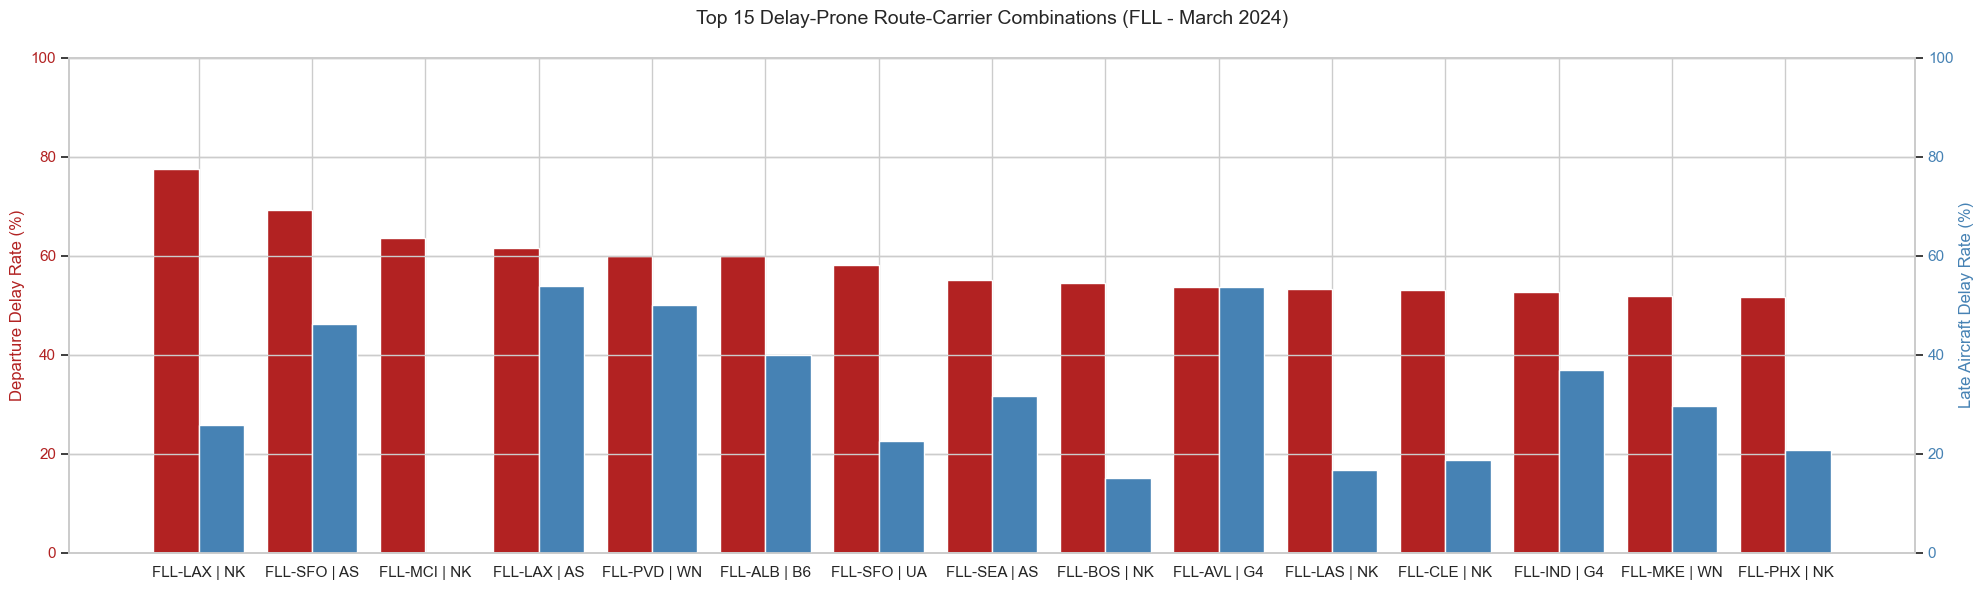

ROUTE OP_UNIQUE_CARRIER  flight_count  delay_rate  late_aircraft_rate  \
82   FLL-LAX                NK            31    0.774194            0.258065   
139  FLL-SFO                AS            13    0.692308            0.461538   
88   FLL-MCI                NK            11    0.636364            0.000000   
79   FLL-LAX                AS            13    0.615385            0.538462   
123  FLL-PVD                WN            10    0.600000            0.500000   
..       ...               ...           ...         ...                 ...   
27   FLL-BUF                B6            31    0.129032            0.096774   
121  FLL-PNS                NK            31    0.129032            0.032258   
81   FLL-LAX                DL            29    0.103448            0.034483   
109  FLL-ORH                B6            30    0.100000            0.033333   
111  FLL-PDX                AS            16    0.000000            0.000000   

     avg_late_aircraft_delay  
82                  9.708333  
139                35.142857  
88                  0.000000  
79                 46.181818  
123                67.600000  
..                       ...  
27                 15.600000  
121                 1.285714  
81                 21.000000  
109                 8.400000  
111                 0.000000  

[130 rows x 6 columns]

In [11]:
# ËøáÊª§Âá∫ FLL Âá∫ÂèëÔºåÈùûÂèñÊ∂àÈùûÊîπÈÅìËà™Áè≠
fll_active_df = df_all[
    (df_all["ORIGIN"] == "FLL") &
    (df_all["CANCELLED"] != 1) &
    (df_all["DIVERTED"] != 1)
].copy()

# ÈÄâÊã©ÁõÆÊ†áÊúà‰ªΩÔºö2024Âπ¥3Êúà
target_month_df = fll_active_df[
    pd.to_datetime(fll_active_df["FL_DATE"]).dt.to_period("M") == pd.Period("2024-03")
].copy()

# ÂØπ ROUTE ‰∏é OP_UNIQUE_CARRIER ËÅöÂêàÔºöËÆ°ÁÆóÂª∂ËØØÁéáÂíåÊôöÂà∞Ëà™Áè≠Âç†ÊØî
route_carrier_summary = (
    target_month_df
    .groupby(["ROUTE", "OP_UNIQUE_CARRIER"])
    .agg(
        flight_count=("DEP_DEL15", "count"),
        delay_rate=("DEP_DEL15", "mean"),
        late_aircraft_rate=("LATE_AIRCRAFT_DELAY", lambda x: (x > 0).mean()),
        avg_late_aircraft_delay=("LATE_AIRCRAFT_DELAY", "mean")
    )
    .reset_index()
)

# ‰øùÁïôËà™Áè≠ÈáèÂÖÖË∂≥ÁöÑËà™Á∫øËà™Âè∏ÁªÑÂêàÔºàÂ¶Ç ‚â•10 Áè≠Ôºâ
filtered_summary = route_carrier_summary[route_carrier_summary["flight_count"] >= 10]

# ÊòæÁ§∫ÊéíÂ∫èÔºöÊåâÂª∂ËØØÁéáÂíåÊôöÂà∞Âç†ÊØîÊéíÂ∫è
top_delay_routes = filtered_summary.sort_values(by=["delay_rate", "late_aircraft_rate"], ascending=False)
# ËØªÂèñÁî®Êà∑Êèê‰æõÁöÑÁúüÂÆûÂàÜÊûêÁªìÊûú
df_top_routes = top_delay_routes.copy()

# ‰ªÖ‰øùÁïô‰∏ªË¶ÅÂ≠óÊÆµÂπ∂ÊéíÂ∫èÂ±ïÁ§∫Ââç15Êù°ÔºàÁî®‰∫éÂèØËßÜÂåñÔºâ
df_top15 = df_top_routes.sort_values(by=["delay_rate", "late_aircraft_rate"], ascending=False).head(15)

# ÂèØËßÜÂåñÔºöÂª∂ËØØÁéá & ÊôöÂà∞Ëà™Áè≠ÊØî‰æãÔºàÂèåËΩ¥Êü±Áä∂ÂõæÔºâ
fig, ax1 = plt.subplots(figsize=(20, 6))

bar_width = 0.4
x = range(len(df_top15))

# Â∑¶ËΩ¥ÔºöÂª∂ËØØÁéá
ax1.bar([i - bar_width/2 for i in x], df_top15["delay_rate"] * 100, 
        width=bar_width, label="Departure Delay Rate (%)", color="firebrick")
ax1.set_ylabel("Departure Delay Rate (%)", color="firebrick")
ax1.set_ylim(0, 100)
ax1.tick_params(axis='y', labelcolor="firebrick")

# Âè≥ËΩ¥ÔºöÊôöÂà∞Âç†ÊØî
ax2 = ax1.twinx()
ax2.bar([i + bar_width/2 for i in x], df_top15["late_aircraft_rate"] * 100,
        width=bar_width, label="Late Aircraft Delay Rate (%)", color="steelblue")
ax2.set_ylabel("Late Aircraft Delay Rate (%)", color="steelblue")
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelcolor="steelblue")

# XËΩ¥Ê†áÁ≠æ
combined_labels = df_top15["ROUTE"] + " | " + df_top15["OP_UNIQUE_CARRIER"]
plt.xticks(ticks=x, labels=combined_labels, rotation=45, ha="right")

# Âõæ‰æã‰∏éÊ†áÈ¢ò
fig.suptitle("Top 15 Delay-Prone Route-Carrier Combinations (FLL - March 2024)", fontsize=14)
fig.tight_layout()
plt.show()

top_delay_routes


- ‚úÖ Chart Variable Explanation
    - Red bars: Departure Delay Rate (%)

    - Blue bars: Late Aircraft Delay Rate (%)

    - X-axis labels: ROUTE + airline code (e.g., FLL-LAX | NK indicates Spirit Airlines flying to Los Angeles)

**üìä Analysis Insights:**
1. Spirit (NK) frequently appears on multiple high-delay routes
    - For example:
        - FLL-LAX | NK departure delay rate ‚âà 77%, late arrival rate ‚âà 26%

        - FLL-SFO | NK departure delay rate ‚âà 69%, late arrival rate ‚âà 46%

        - FLL-LAX | NK (repeated route) still experiences severe delays

    - ‚úÖ This indicates that Spirit faces systemic scheduling bottlenecks on West Coast routes, potentially involving:

        - Longer flight distances have a greater impact on aircraft scheduling chains

        - Frequent delays in preceding flights trigger chain delays

2. Some routes have low late arrival rates but remain highly delayed
    - Such as FLL-SEA | NK and FLL-BOS | NK, indicating that delays are not caused by preceding flights but may be dominated by boarding, taxiing, and tower resources

    - ‚úç Strategy recommendation: Airport management should prioritize analyzing these ‚Äúnon-delay-dominated routes‚Äù to optimize gate allocation and taxiing scheduling

3. Spirit is the most concentrated airline (NK), followed by B6 (JetBlue)
    - However, in the Top 15 combinations, Spirit dominates absolutely, indicating its highly concentrated distribution on high-delay routes

    - Spirit's high-density seating and high-turnover operational model can easily create ‚Äúlocal resource pressure‚Äù in concentrated route areas (e.g., FLL).

üéØ Operational and market-level recommendations
| Recommended direction         | Explanation                                                 |
| ------------ | -------------------------------------------------- |
| **Route re-optimization**   | It is recommended that Spirit reduce the concentration of departure times for red-eye flights on the West Coast to alleviate peak tower/taxiing load              |
| **Delay Service Strategy Deployment** | For routes with concentrated delays (e.g., LAX, SFO, BOS), deploy retail + catering compensation schemes to enhance customer satisfaction     |
| **Coordinated Scheduling with Airline Communication** | MIA and FLL share airspace; Spirit can coordinate with the airport to share predictive systems, issue early warnings for high-risk late-arriving flights, and adjust boarding sequences |

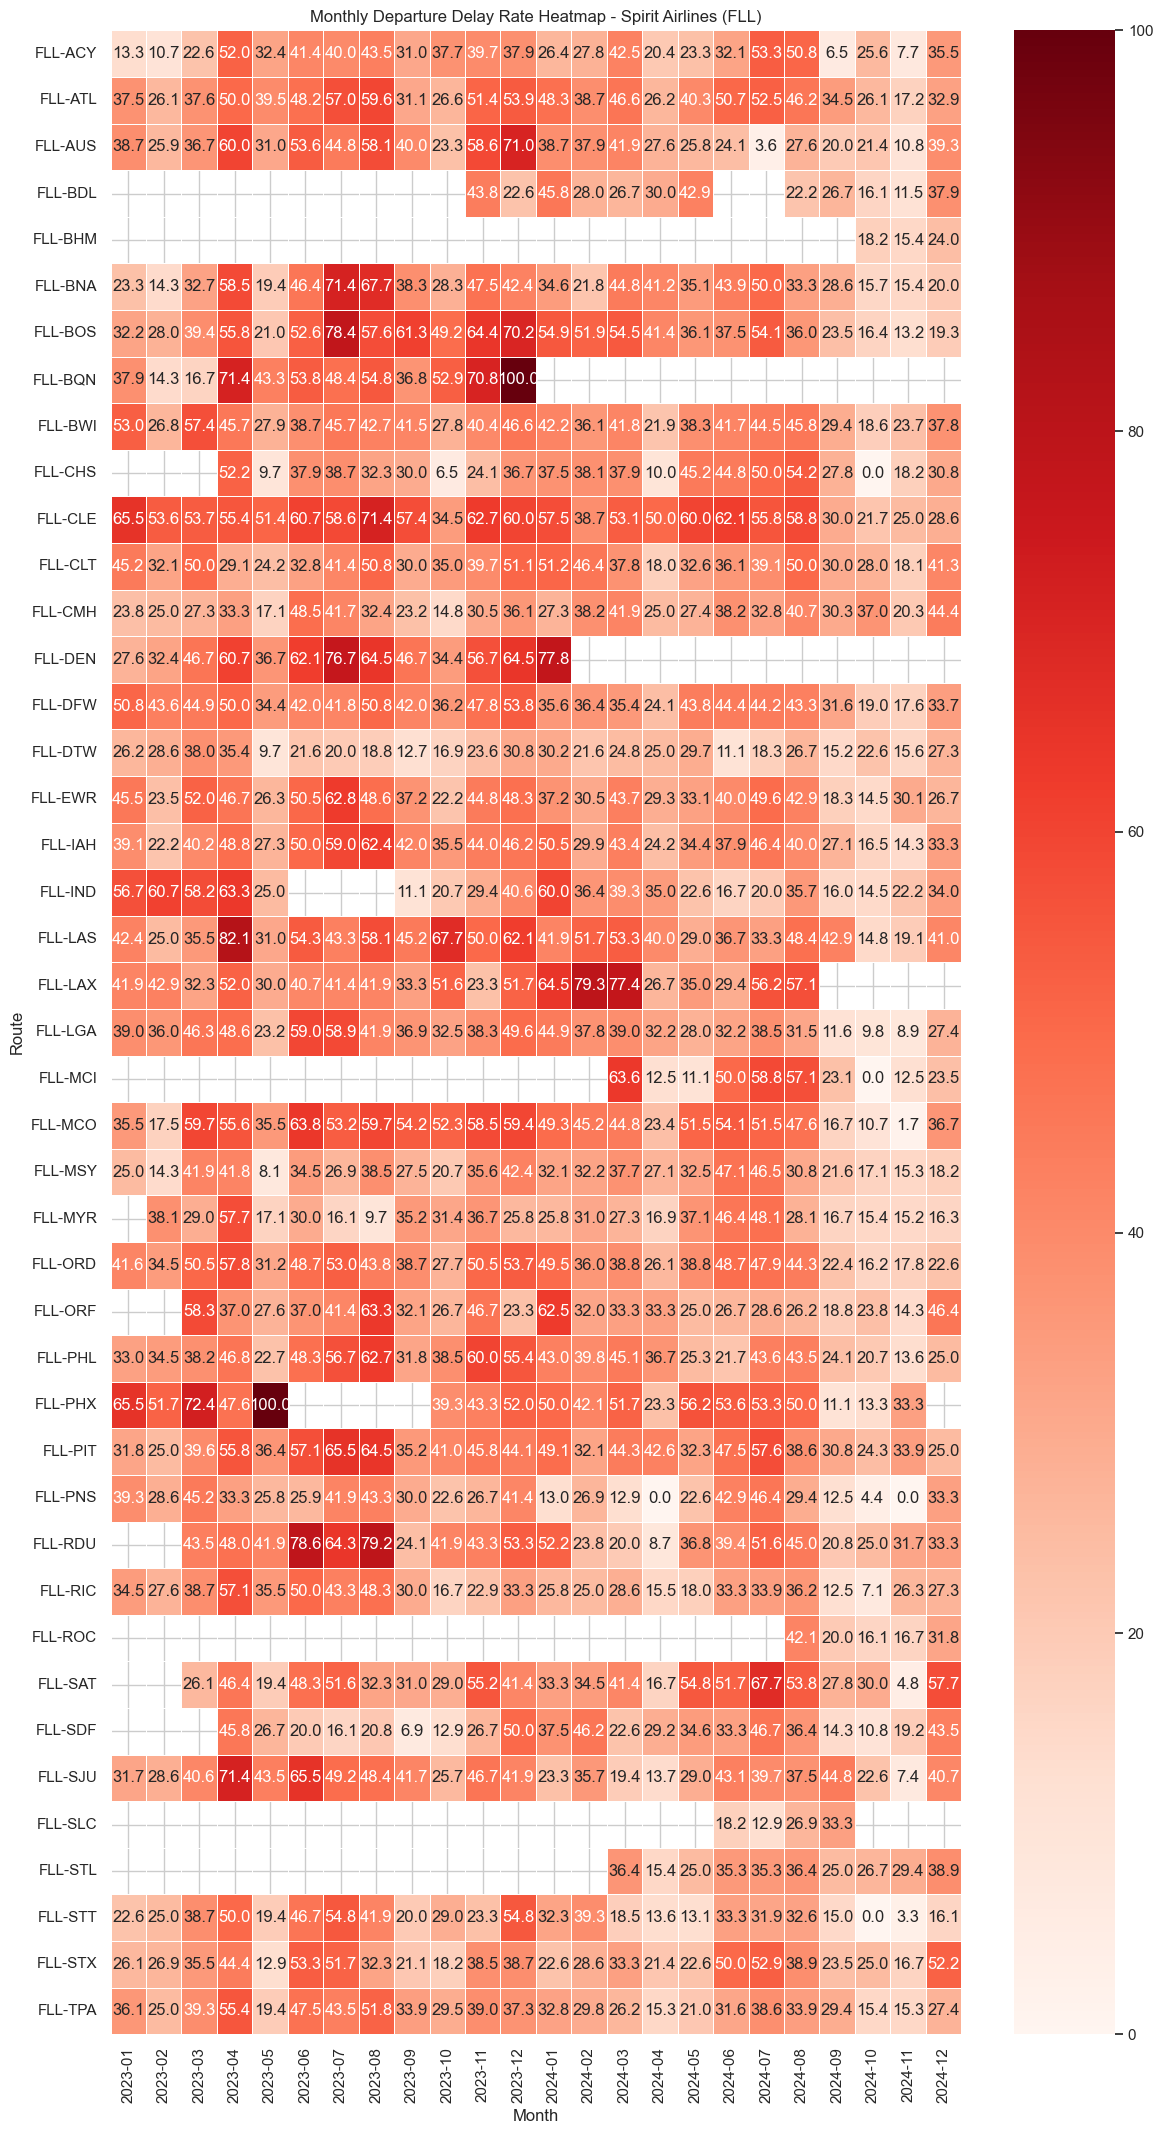

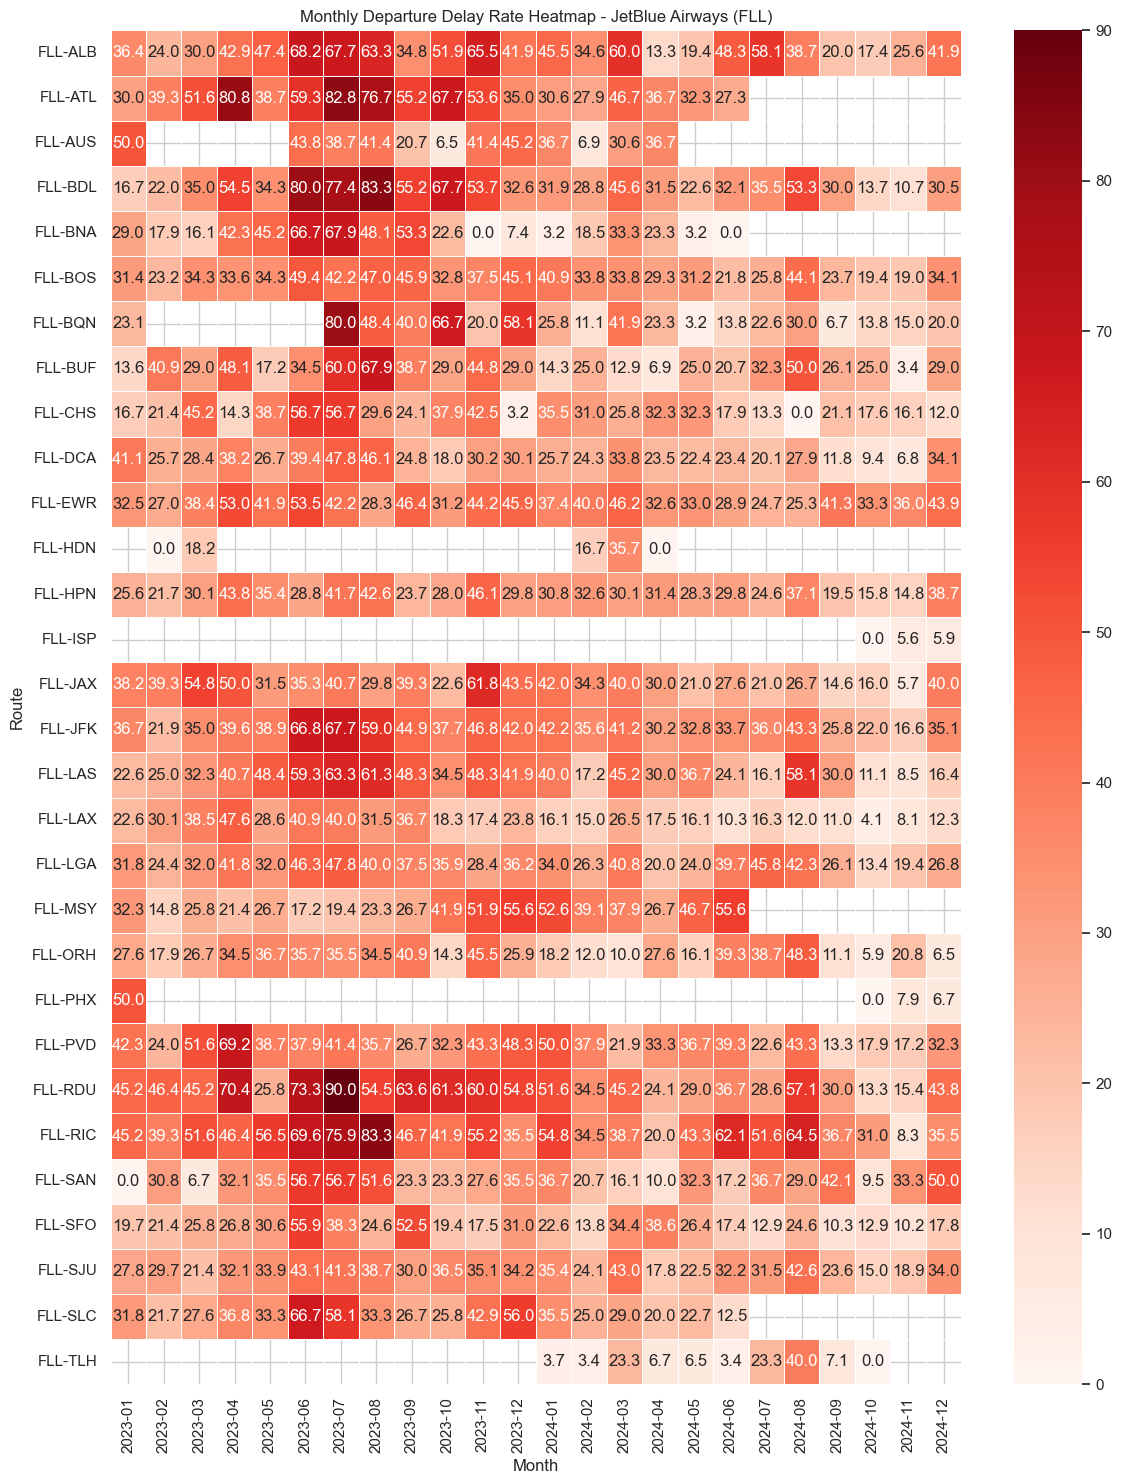

In [12]:
# ‰ªéÂÆåÊï¥Êï∞ÊçÆÈõÜ‰∏≠Á≠õÈÄâÂá∫ FLL Âá∫Âèë + ÈùûÂèñÊ∂à/ÊîπÈÅìËà™Áè≠ + Spirit (NK) Âíå JetBlue (B6)
fll_major_df = df_all[
    (df_all["ORIGIN"] == "FLL") &
    (df_all["CANCELLED"] != 1) &
    (df_all["DIVERTED"] != 1) &
    (df_all["OP_UNIQUE_CARRIER"].isin(["NK", "B6"]))
].copy()

# ÂàõÂª∫Êó∂Èó¥Â≠óÊÆµ‰∏∫Êúà‰ªΩ
fll_major_df["FL_DATE"] = pd.to_datetime(fll_major_df["FL_DATE"])
fll_major_df["Month"] = fll_major_df["FL_DATE"].dt.to_period("M").astype(str)

# ËÆ°ÁÆóÊØè‰∏™Ëà™Á∫øÔºàROUTEÔºâÊØèÊúàÁöÑÂª∂ËØØÁéáÔºàÂàÜÂà´ÂØπ NK ‰∏é B6Ôºâ
route_monthly_trend = (
    fll_major_df.groupby(["Month", "ROUTE", "OP_UNIQUE_CARRIER"])
    .agg(delay_rate=("DEP_DEL15", "mean"))
    .reset_index()
)

# Á≠õÈÄâÂá∫Ëà™Áè≠ÈáèËæÉÂ§ßÁöÑËà™Á∫øÔºåÈÅøÂÖçÁÉ≠ÂäõÂõæÂ§™Á®ÄÁñè
route_counts = fll_major_df.groupby(["ROUTE", "OP_UNIQUE_CARRIER"]).size().reset_index(name="flight_count")
top_routes = route_counts[route_counts["flight_count"] >= 30][["ROUTE", "OP_UNIQUE_CARRIER"]]

# ÂêàÂπ∂Á≠õÈÄâÔºå‰ªÖ‰øùÁïôËà™Á∫øÈáèÂ§ßÁöÑÁªÑÂêà
filtered_trend = route_monthly_trend.merge(top_routes, on=["ROUTE", "OP_UNIQUE_CARRIER"])

# ÂàõÂª∫ÈÄèËßÜË°®‰æõÁÉ≠ÂäõÂõæ‰ΩøÁî®
heatmap_data = filtered_trend.pivot_table(
    index="ROUTE",
    columns="Month",
    values="delay_rate"
)

# ÂàÜÂà´ÁªòÂà∂ Spirit (NK) Âíå JetBlue (B6) ÁöÑÁÉ≠ÂäõÂõæ
import matplotlib.pyplot as plt
import seaborn as sns
for carrier_code, carrier_name in [("NK", "Spirit Airlines"), ("B6", "JetBlue Airways")]:
    # Á≠õÈÄâËØ•Ëà™Âè∏Êï∞ÊçÆ
    carrier_df = filtered_trend[filtered_trend["OP_UNIQUE_CARRIER"] == carrier_code]

    # ÂàõÂª∫ÈÄèËßÜË°®ÔºàËà™Á∫ø √ó Êúà‰ªΩÔºâ= Âª∂ËØØÁéá
    heatmap_df = carrier_df.pivot_table(
        index="ROUTE",
        columns="Month",
        values="delay_rate"
    )

    # ÁªòÂà∂ÁÉ≠ÂäõÂõæ
    plt.figure(figsize=(12, max(6, len(heatmap_df) * 0.5)))
    sns.heatmap(heatmap_df * 100, cmap="Reds", linewidths=0.5, annot=True, fmt=".1f")
    plt.title(f"Monthly Departure Delay Rate Heatmap - {carrier_name} (FLL)")
    plt.xlabel("Month")
    plt.ylabel("Route")
    plt.tight_layout()
    plt.show()

**Spirit vs JetBlue Heat Map Comparison (FLL Departures 2023‚Äì2024)**
| Item       | Spirit Airlines (NK) | JetBlue Airways (B6) |
| -------- | -------------------- | -------------------- |
| Number of Popular Routes   | Many (>30 continuously operated routes)        | Relatively concentrated, slightly fewer routes            |
| Monthly Delay Rate Cap  | Exceeds 90% (e.g., FLL-BQN)      | Approaches 90% (e.g., FLL-RIC)      |
| Concentration of High-Delay Months | Clearly concentrated in peak travel periods such as March, June, and December | Broadly distributed, influenced by seasonal factors but also structural high delays   |
| High-risk route stability | Multiple routes repeatedly experience high delays across multiple quarters | Some routes exhibit significant delay fluctuations, influenced by weather or scheduling factors |  



- ‚úÖ **Spirit Airlines Heatmap Findings (Figure 1)**
    - üî• High-delay route identification:
        - FLL-BQN, FLL-DFW, FLL-CLE, FLL-CLT, FLL-RDU, FLL-IAH frequently exceed delay rates of 60‚Äì80%

        - There are routes with obvious systemic high delays throughout the year

    - üìà **Seasonal Resonance Trends:**
        - Multiple routes experience simultaneous surge in delays in March (Spring Break), June (summer kickoff), and December (holiday return)

        - This suggests that Spirit's route network faces severe scheduling resource constraints during holiday periods

- ‚úÖ **JetBlue Airways Heatmap Findings (Figure 2)**
    - üîç Delay-Prone Routes:
        - FLL-RIC, FLL-RDU, FLL-JFK, FLL-PVD experience over 60% high delays in specific months

        - Primarily focused on northeastern destinations, indicating JetBlue's delays are more influenced by destination weather and hub connections

    - üìâ **Structural vs. Random:**
        - Compared to Spirit's structural high delays, some of JetBlue's high-delay routes exhibit significant monthly fluctuations and weak persistence.

        - This may be due to JetBlue's relatively low flight frequency, with fewer monthly flights, making it more susceptible to the impact of individual high-delay flights.

- üéØ **Summary Insights and Recommendations**
    - üõ´ Airport Management Perspective:
        - For Spirit, demand for high-delay routes (e.g., FLL-DFW, FLL-BQN) should be predicted in advance, and taxiing/boarding resources should be allocated in advance.

        - For JetBlue, flight operation strategies for weather-sensitive routes during winter (e.g., FLL-JFK) should be prioritized.

- üìä **Data Modeling Direction:**
    - A delay risk scoring model can be constructed at the route-month level to predict potential high-pressure routes for future quarters.

    - Additional features can include weather variables, aircraft type, and airline historical on-time performance rates.

- üìà **Commercial Value Applications:**
    - On these routes, it is recommended to implement plans such as layover compensation services, meal discounts during delays, and expanded lounge capacity.

    - For high-delay, high-traffic routes (e.g., FLL-LAX, FLL-DFW), a ‚Äúpeak buffer ticket‚Äù mechanism can be developed to achieve a win-win outcome.

## **2.6 Aircraft Model and Delay Rate**

C:\Users\weika\AppData\Local\Temp\ipykernel_85672\2709049605.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_models, x="delay_rate", y="MODEL", palette="Reds_r")


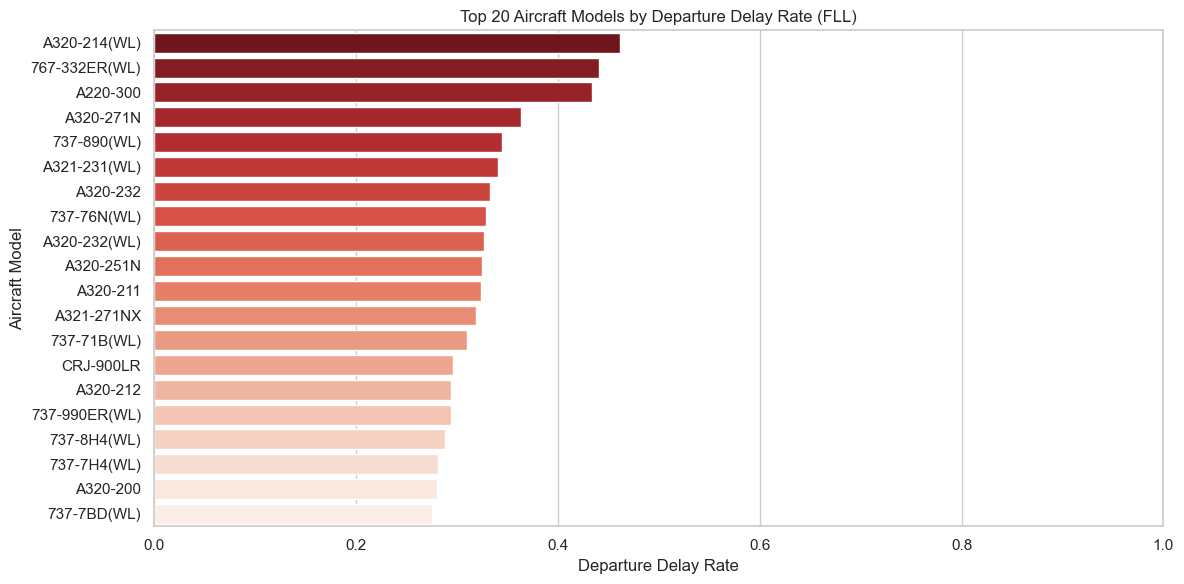

In [13]:
# ‰ªÖ‰ΩøÁî® FLL Âá∫ÂèëÁöÑÈùûÂèñÊ∂à„ÄÅÈùûÊîπÈÅìËà™Áè≠
fll_model_df = df_all[
    (df_all["ORIGIN"] == "FLL") &
    (df_all["CANCELLED"] != 1) &
    (df_all["DIVERTED"] != 1)
].copy()

# ÁªüËÆ°ÊØè‰∏™È£ûÊú∫ÂûãÂè∑ÁöÑÂª∂ËØØÁéáÂíåÊ†∑Êú¨Êï∞Èáè
model_delay_stats = (
    fll_model_df.groupby("MODEL")
    .agg(
        flight_count=("DEP_DEL15", "count"),
        delay_rate=("DEP_DEL15", "mean"),
        avg_delay_time=("DEP_DELAY", "mean")
    )
    .reset_index()
)

# Á≠õÈÄâÂá∫Ëà™Áè≠Êï∞Â§ß‰∫é‰∏ÄÂÆöÈòàÂÄºÁöÑÊú∫ÂûãÔºåÈÅøÂÖçÂ∞èÊ†∑Êú¨ÂΩ±Âìç
model_delay_stats = model_delay_stats[model_delay_stats["flight_count"] >= 50]

# ÊåâÂª∂ËØØÁéáÊéíÂ∫èÔºåÂèñÂâç20‰∏™ËøõË°åÂèØËßÜÂåñ
top_models = model_delay_stats.sort_values(by="delay_rate", ascending=False).head(20)

# ÂèØËßÜÂåñ
plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x="delay_rate", y="MODEL", palette="Reds_r")
plt.title("Top 20 Aircraft Models by Departure Delay Rate (FLL)")
plt.xlabel("Departure Delay Rate")
plt.ylabel("Aircraft Model")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


## **2.6 Aircraft Model and Airline and Delay Rate**

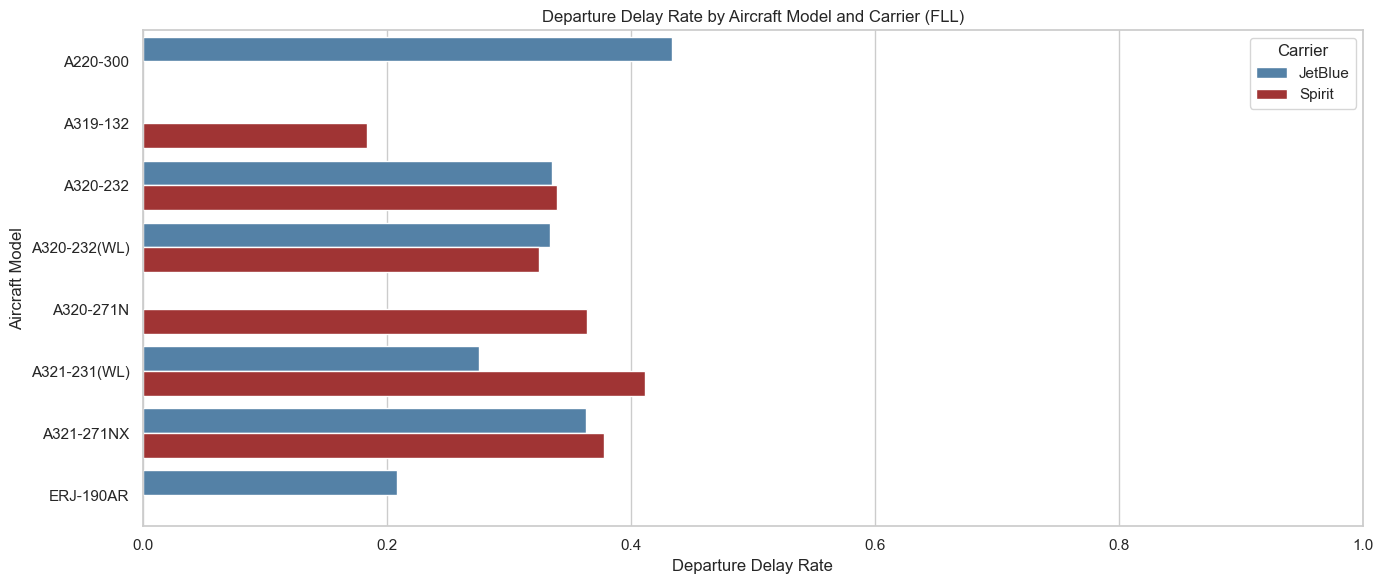

In [14]:
# ÁªüËÆ°ÊØè‰∏™ MODEL + Ëà™Âè∏ÁªÑÂêàÁöÑÂª∂ËØØÁéá‰∏éÊ†∑Êú¨Êï∞



fll_model_carrier_df = fll_model_df[
    fll_model_df["OP_UNIQUE_CARRIER"].isin(["B6", "NK"])
].copy()

model_carrier_stats = (
    fll_model_carrier_df.groupby(["MODEL", "OP_UNIQUE_CARRIER"])
    .agg(
        flight_count=("DEP_DEL15", "count"),
        delay_rate=("DEP_DEL15", "mean")
    )
    .reset_index()
)

# Âè™‰øùÁïôËà™Áè≠Êï∞ ‚â• 50 ÁöÑÊ®°Âûã-Ëà™Âè∏ÁªÑÂêà
model_carrier_stats = model_carrier_stats[model_carrier_stats["flight_count"] >= 50]

# ‰∏∫ÊØè‰∏™Ëà™Âè∏ÂëΩÂêç
model_carrier_stats["Carrier"] = model_carrier_stats["OP_UNIQUE_CARRIER"].map({
    "B6": "JetBlue",
    "NK": "Spirit"
})

# ËÆ°ÁÆóÂâç20‰∏™Ê®°ÂûãÔºàÊåâÂêàÂπ∂Âª∂ËØØÁéáÊéíÂ∫èÔºâ
top_models_overall = (
    model_carrier_stats.groupby("MODEL")
    .agg(overall_delay=("delay_rate", "mean"))
    .sort_values(by="overall_delay", ascending=False)
    .head(20)
    .index
)

# ‰ªÖ‰øùÁïôËøô‰∫õÊ®°ÂûãÁöÑÊï∞ÊçÆÁî®‰∫éÂàÜÁªÑÂèØËßÜÂåñ
filtered_data = model_carrier_stats[model_carrier_stats["MODEL"].isin(top_models_overall)]

# ÁªòÂà∂ÂàÜÁªÑÊù°ÂΩ¢Âõæ
plt.figure(figsize=(14, 6))
sns.barplot(
    data=filtered_data,
    x="delay_rate",
    y="MODEL",
    hue="Carrier",
    palette={"JetBlue": "steelblue", "Spirit": "firebrick"}
)
plt.title("Departure Delay Rate by Aircraft Model and Carrier (FLL)")
plt.xlabel("Departure Delay Rate")
plt.ylabel("Aircraft Model")
plt.xlim(0, 1)
plt.legend(title="Carrier")
plt.tight_layout()
plt.show()


| **Aircraft type**           | **JetBlue delay rate** | **Spirit delay rate** | **Which is higher**       | **Observation point**             |
| ------------ | ----------- | ---------- | ---------- | ---------------- |
| A220-300     | \~0.44      | ‚Äî          | üü¶ JetBlue | JetBlue exclusive operation, higher delays |
| A319-132     | ‚Äî           | \~0.32     | üü• Spirit  | Used by Spirit, moderate to low delays  |
| A320-232     | \~0.35      | \~0.36     | üü• Spirit  | Delay rates are almost the same, with Spirit slightly higher |
| A320-232(WL) | \~0.35      | \~0.33     | üü¶ JetBlue | JetBlue slightly higher        |
| A320-271N    | ‚Äî           | \~0.38     | üü• Spirit  | Spirit delays more significant      |
| A321-231(WL) | \~0.30      | \~0.42     | üü• Spirit  | Significant difference, Spirit significantly higher  |
| A321-271NX   | \~0.36      | \~0.37     | üü• Spirit  | Small difference but Spirit still higher     |
| ERJ-190AR    | \~0.22      | ‚Äî          | üü¶ JetBlue | JetBlue has lower delays   |


- ‚úÖ Spirit generally has higher delay rates
    - On the A321 series and A320-271N, Spirit's delays are significantly higher than JetBlue's, indicating greater operational pressure on large-capacity narrow-body aircraft

Spirit may use higher turnaround frequencies and more intensive scheduling, making it easier for previous delays to accumulate

- ‚úÖ JetBlue has lower delays on modern aircraft such as the ERJ and A220
    - This indicates that it may be more optimized in terms of new aircraft management and route matching

- Although the A220-300 has high delays, JetBlue has exclusive rights to it, indicating that the aircraft itself is not a stability issue and may be affected by specific routes

**üéØ Strategic Recommendations:**
| Application Direction   | Recommendations                                         |
| ------ | ------------------------------------------ |
| Airline Cooperation Negotiations | For Spirit's high-delay aircraft routes, recommend prioritizing scheduling collaboration and early warning mechanisms with FLL.          |
| Model Feature Input | Delay prediction models can incorporate the joint feature `MODEL + OP_UNIQUE_CARRIER`. |
| Commercialization Strategy  | Increase waiting services on routes with concentrated high-delay aircraft to enhance the experience of stranded passengers and improve conversion rates.           |

## **2.7 Aircraft Age, Taxi-out time, and Delay Rate**

In [21]:
import pandas as pd

# ÈáçÊñ∞ËØªÂèñÂêàÂπ∂Êï∞ÊçÆ
df2023 = pd.read_csv("2023_data.csv")
df2024 = pd.read_csv("2024_data.csv")
df_all = pd.concat([df2023, df2024], ignore_index=True)

# ‰ªÖ‰øùÁïôFLLÂá∫Âèë„ÄÅÊú™ÂèñÊ∂à/ÊîπÈÅì„ÄÅÊ®°Âûã‰∏ç‰∏∫Á©∫ÁöÑËà™Áè≠
df_all["FL_DATE"] = pd.to_datetime(df_all["FL_DATE"])
fll_model_df = df_all[
    (df_all["ORIGIN"] == "FLL") &
    (df_all["CANCELLED"] != 1) &
    (df_all["DIVERTED"] != 1) &
    (df_all["MODEL"].notna())
].copy()

# Á≠õÈÄâËà™Áè≠ÈáèË∂≥Â§üÁöÑÊú∫ÂûãÔºàÊ†∑Êú¨Êï∞ ‚â• 30Ôºâ
model_summary = (
    fll_model_df.groupby("MODEL")
    .agg(
        flight_count=("DEP_DELAY", "count"),
        avg_taxi_out=("TAXI_OUT", "mean"),
        avg_dep_delay=("DEP_DELAY", "mean"),
        avg_age=("AGE_FLIGHT", "mean")
    )
    .reset_index()
)
model_summary = model_summary[model_summary["flight_count"] >= 30]
model_summary



MODEL  flight_count  avg_taxi_out  avg_dep_delay    avg_age
0     737-71B(WL)           145     16.282759      19.703448  17.331812
2     737-724(WL)            98     20.173469      13.602041  24.399636
3     737-73V(WL)           156     16.480769      16.641026  21.392512
4     737-752(WL)           268     17.130597      13.462687  17.039236
5     737-76N(WL)           413     17.815981      21.687651  18.660486
6     737-76Q(WL)           185     17.102703      15.605405  21.721680
7     737-79L(WL)            42     14.880952       5.690476  18.020500
8     737-79P(WL)           459     16.864924      15.947712  19.207199
9     737-7BD(WL)          1140     17.678947      15.765789  16.619036
11    737-7CT(WL)           341     17.448680      15.457478  20.138741
12    737-7H4(WL)          8238     17.210488      16.239136  17.553224
13    737-7K5(WL)            37     19.378378      18.270270  16.468776
14    737-7K9(WL)            66     15.848485      15.121212  18.088179
15    737-7Q8(WL)           467     16.672377      12.822270  20.750667
17      737-8 MAX         11585     18.962969      15.418472   1.971986
18        737-800          1899     17.915745      23.048973  16.826276
19    737-823(WL)           952     17.448529      22.085084   8.779474
20    737-824(WL)          4067     19.489550      11.970248  19.720953
21    737-832(WL)          2048     18.011230      17.570801  22.812336
23    737-890(WL)           212     21.683962      25.839623  15.427311
24    737-8EH(WL)            85     18.776471      20.988235  10.130241
26    737-8H4(WL)          9112     17.035887      15.942603   8.065055
27      737-9 MAX          3426     21.201693      12.845301   2.134591
28    737-924(WL)           202     20.267327      13.029703  21.835161
29  737-924ER(WL)          2778     19.030238      12.225702  10.911331
30  737-932ER(WL)          1534     18.320730      11.831160   7.127026
31  737-990ER(WL)           714     22.809524      16.229692   7.497457
32    757-224(WL)           592     20.336149      14.837838  26.547682
34        757-232          1170     17.952991      14.513675  29.205677
35    757-232(WL)          3161     17.515027      14.047453  26.093758
36    757-251(WL)          1842     17.390337      17.270901  25.174454
37    757-26D(WL)           770     17.359740      14.936364  20.576069
39    757-324(WL)            95     21.210526      11.800000  20.637408
40    757-33N(WL)           173     21.346821      19.219653  21.215178
41    757-351(WL)          1365     17.931868      15.049817  20.681107
42  767-332ER(WL)            59     19.101695      72.508475  26.636926
47       A220-300           424     19.063679      35.926887   1.073410
49       A319-112           419     16.787589      18.673031  23.167178
50       A319-114           428     19.733645      16.292056  21.966099
51       A319-131            65     24.169231      26.353846  23.179824
52       A319-132           783     16.263091      11.098340  17.141474
53       A320-200           139     16.719424      42.338129  21.238329
54       A320-211            71     17.985915      21.352113  29.445186
55       A320-212           197     18.553299      25.065990  26.417537
56   A320-214(WL)           197     21.497462      32.883249   7.911374
57       A320-232         29087     17.822120      23.055661  17.923945
58   A320-232(WL)          9877     16.349296      20.789713   9.159236
59      A320-251N          2568     21.384735      25.169782   3.922514
60      A320-271N         18180     15.949560      21.460176   2.427674
61       A321-200          1831     17.051884      19.643910  18.565211
62   A321-211(WL)          6896     18.261746      16.850638   4.637931
63   A321-213(WL)          1849     17.974040      11.531639   6.513485
64       A321-231          3157     17.113716      18.014888  11.155548
65   A321-231(WL)         20917     17.352680      24.443610   7.066203
67     A321-253NX           331     18.087613      1

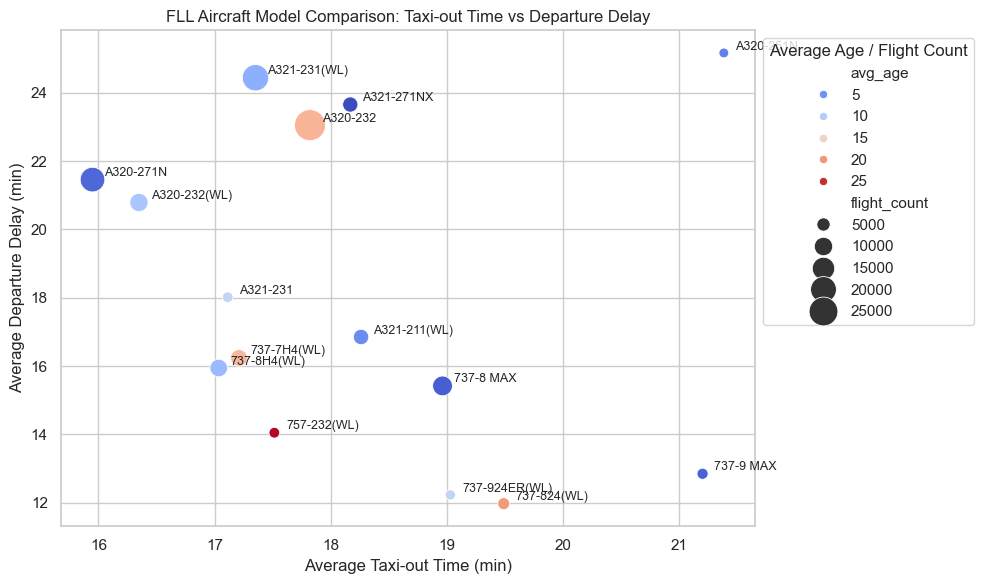

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
top_models = model_summary.sort_values(by="flight_count", ascending=False).head(15)

# ‰øÆÂ§çÊ≥®ÈáäÂæ™ÁéØ‰∏≠Á¥¢ÂºïÈóÆÈ¢òÔºåÊîπÁî® .iloc ÊòæÂºèËÆøÈóÆË°å
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=top_models,
    x="avg_taxi_out",
    y="avg_dep_delay",
    size="flight_count",
    hue="avg_age",
    palette="coolwarm",
    sizes=(50, 500),
    legend="brief"
)

# Ê≠£Á°ÆÊñπÂºèÔºöÁî® .iloc ÈÄêË°åËØªÂèñÊï∞ÂÄºÂπ∂Ê†áÊ≥®Êú∫Âûã
for i in range(len(top_models)):
    row = top_models.iloc[i]
    plt.text(
        row["avg_taxi_out"] + 0.1,
        row["avg_dep_delay"] + 0.1,
        row["MODEL"],
        fontsize=9
    )

plt.title("FLL Aircraft Model Comparison: Taxi-out Time vs Departure Delay")
plt.xlabel("Average Taxi-out Time (min)")
plt.ylabel("Average Departure Delay (min)")
plt.legend(title="Average Age / Flight Count", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


- ‚úÖ 1. High taxiing + high delay quadrant (upper right corner)  
    - `A321-231(WL)`, `A321-271NX`, `A320-232`, etc.:

    - Taxiing time ‚â•18 minutes, departure delay ‚â•23 minutes

    - All are Airbus A320/A321 series models, larger in size, and serve as the main aircraft types for airlines such as Spirit or JetBlue.  

    - It is speculated that these are concentrated on high-density routes or peak scheduling segments, where scheduling pressure is high.  

- ‚úÖ 2. Low taxiing + low delay quadrant (bottom left)  
    - `737-9 MAX`, `737-924ER (WL)`, `737-824 (WL)`:  

    - Taxiing and delays are both controlled within the 12‚Äì16-minute range  

    - Demonstrates excellent scheduling response efficiency, suitable as a scheduling benchmark  

    - ‚úÖ 3. Efficiency and age are not completely positively correlated  
    - A320-232, despite its high age (dark red), still has relatively high taxiing/delay times

    - 737 MAX series with lower age (light blue) demonstrate better scheduling efficiency

    - Indicating that efficiency depends more on operational strategies and scheduling controls rather than simply aircraft age

**üéØ Strategic Recommendations**

| Recommended Direction              | Content                                              |
| ----------------- | ----------------------------------------------- |
| **Gate Scheduling Optimization**       | Consider diverting A320/321 series to more flexible gates to alleviate pressure on concentrated taxiways             |
| **Aircraft Type-Time Slot Review**      | Analyze the departure time slot distribution of high-delay aircraft types. If concentrated during morning/evening peak hours, consider off-peak operations               |
| **Scheduling Simulation Reference Standards**      | Use the 737-9 MAX and 737-8 series as a baseline for scheduling response efficiency, and reverse-engineer resource utilization overflow rates for other aircraft types. |
| **Aircraft Type-Taxiing Resource Binding Risk Assessment** | Analyze whether taxiing times are consistently high ‚Üí Feedback to the control tower to review taxiing path configurations or queuing mechanisms.               |

# **Part 3 - Market and Analysis**

## **3.1 Comparison of departing flight volumes in 2023 and 2024**

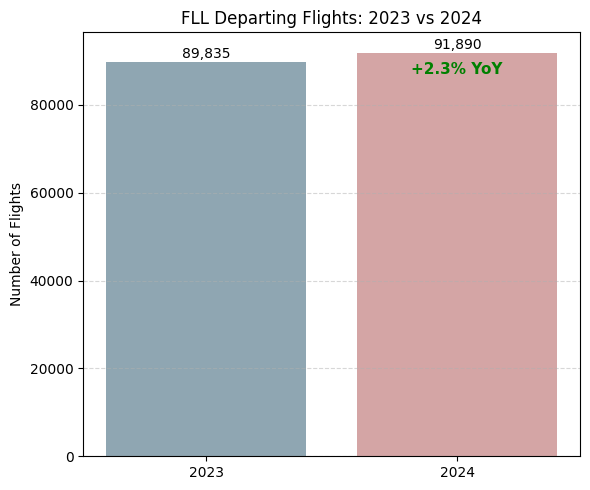

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# ËØªÂèñ‰∏éÈ¢ÑÂ§ÑÁêÜ
df = pd.read_csv("FLL_data.csv")
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# ÊèêÂèñ FLL Ëµ∑È£ûËà™Áè≠Êï∞Èáè
fll_departures = df[df['ORIGIN'] == 'FLL'].copy()
fll_departures['YEAR'] = fll_departures['FL_DATE'].dt.year

# ÁªüËÆ°Ëà™Áè≠Êï∞ÈáèÔºàÊåâÂπ¥Ôºâ
flight_counts = fll_departures[fll_departures['YEAR'].isin([2023, 2024])]['YEAR'].value_counts().sort_index()

# ËÆ°ÁÆóÂêåÊØîÔºà2024 vs 2023Ôºâ
yoy_growth = (flight_counts[2024] - flight_counts[2023]) / flight_counts[2023] * 100

# ÂèØËßÜÂåñ
plt.figure(figsize=(6, 5))
bars = plt.bar(flight_counts.index.astype(str), flight_counts.values, color=['#8fa6b2', '#d4a5a5'])

# Ê†áÊ≥®Êï∞Èáè
for i, val in enumerate(flight_counts.values):
    plt.text(i, val + 100, f"{val:,}", ha='center', va='bottom', fontsize=10)

# Ê†áÊ≥®YoYÂèòÂåñÔºà2024Êü±‰∏äÔºâ
plt.text(1, flight_counts[2024] - 5500,
         f"+{yoy_growth:.1f}% YoY", ha='center', va='bottom', color='green', fontsize=11, fontweight='bold')

plt.title("FLL Departing Flights: 2023 vs 2024")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## **3.2 ‚úàÔ∏è FLL Carrier Market Share Comparison: 2023 vs 2024**

- The above analysis compares the **departure flight count** by carrier from FLL for both 2023 and 2024.
- Market share is computed by dividing each airline's flight count by total FLL departures for that year.
- A side-by-side bar chart visualizes market dynamics, allowing easy observation of:
  - **Leading carriers**
  - **New entrants**
  - **Rising or shrinking shares**


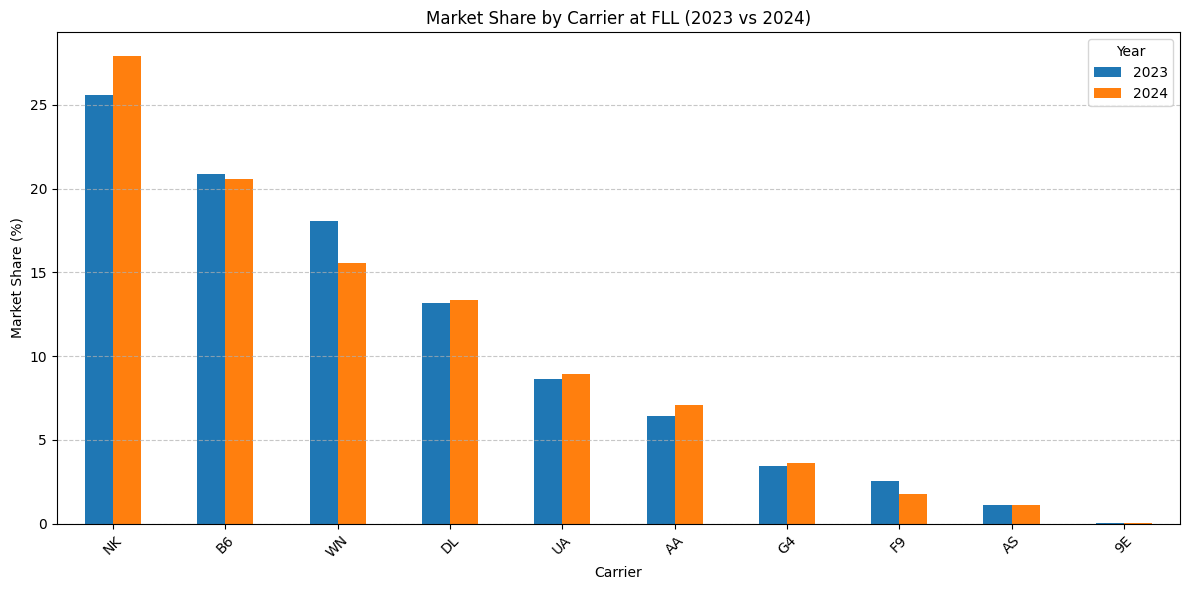

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ËØªÂèñÊï∞ÊçÆÔºà‰Ω†Â∑≤Âä†ËΩΩ‰∏∫ df_2023 Âíå df_2024Ôºâ
df_2023 = pd.read_csv("2023_data.csv")
df_2024 = pd.read_csv("2024_data.csv")

# Ê∑ªÂä†Âπ¥‰ªΩÊ†áËØÜ
df_2023["YEAR"] = 2023
df_2024["YEAR"] = 2024

# ÂêàÂπ∂
df_all = pd.concat([df_2023, df_2024], ignore_index=True)

# Á≠õÈÄâ FLL Âá∫ÂèëÁöÑËà™Áè≠
fll_df = df_all[df_all["ORIGIN"] == "FLL"].copy()

# ÁªüËÆ°ÊØèÂπ¥ÊØèÂÆ∂Ëà™Âè∏Âú® FLL ÁöÑËà™Áè≠Êï∞ÈáèÔºàÂèØÊõøÊç¢‰∏∫ PASSENGERS ÂÅöÂÆ¢Ëøê‰ªΩÈ¢ùÔºâ
carrier_share = (
    fll_df.groupby(["YEAR", "OP_UNIQUE_CARRIER"])
    .size()
    .reset_index(name="FLIGHT_COUNT")
)

# ËÆ°ÁÆóÊØèÂπ¥Â∏ÇÂú∫‰ªΩÈ¢ùÔºàÊ†áÂáÜÂåñÔºâ
carrier_share["MARKET_SHARE"] = carrier_share.groupby("YEAR")["FLIGHT_COUNT"].transform(lambda x: x / x.sum() * 100)

# ÂèØËßÜÂåñÔºöÂ†ÜÂè†Êü±Áä∂Âõæ
pivot_df = carrier_share.pivot(index="OP_UNIQUE_CARRIER", columns="YEAR", values="MARKET_SHARE").fillna(0)
pivot_df = pivot_df.sort_values(by=2024, ascending=False)  # ÊåâÊúÄÊñ∞Âπ¥‰ªΩÊéíÂ∫è

pivot_df.plot(kind="bar", figsize=(12, 6))
plt.title("Market Share by Carrier at FLL (2023 vs 2024)")
plt.ylabel("Market Share (%)")
plt.xlabel("Carrier")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The chart above illustrates the distribution of departing flights by carrier at **Fort Lauderdale-Hollywood International Airport (FLL)** for the years **2023 and 2024**, based on actual flight count.

**Key Observations:**  
- **NK (Spirit Airlines)** remains the dominant carrier at FLL, with its market share **increasing from ~25.5% in 2023 to ~28% in 2024**, indicating continued network investment.
- **B6 (JetBlue)** shows a relatively stable presence, slightly declining but maintaining the second-largest share.
- **WN (Southwest)** experienced a **noticeable drop in market share**, suggesting potential route reduction or reallocation of capacity.
- **DL (Delta)**, **UA (United)**, and **AA (American)** maintain moderate and consistent shares, showing strategic stability.
- **G4 (Allegiant)** and **F9 (Frontier)** occupy smaller but steady niches, primarily serving low-cost or regional routes.
- Minor carriers (e.g., **AS**, **9E**) have negligible shares, often tied to seasonal or codeshare arrangements.

**Implications:**  
- The competitive landscape at FLL remains highly concentrated, with the top 3 carriers accounting for over 60% of total departures.
- Spirit Airlines‚Äô growth may signal rising operational pressure or potential dominance-related vulnerabilities (e.g., delay sensitivity, gate congestion).
- Year-over-year comparisons such as this are valuable for identifying **carrier strategy shifts**, **airport resource allocation needs**, and **negotiation leverage in slot or gate assignments**.


## **3.3 üß≥ FLL Passenger Volume: Departures vs Arrivals (2023 vs 2024)**

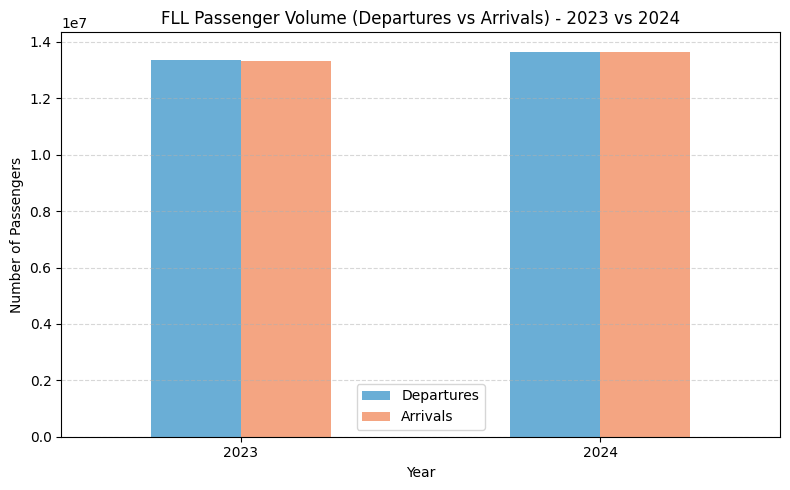

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ËØªÂèñ T100 Êï∞ÊçÆÔºàÂåÖÂê´Â§öÂπ¥ÁöÑËà™Á©∫ÊóÖÂÆ¢ÊµÅÈáèÔºâ
t100_df = pd.read_csv("T100.csv")

# ‰ªÖ‰øùÁïô 2023 ‰∏é 2024 Âπ¥ÔºåÂπ∂‰∏é FLL ÊúâÂÖ≥ÁöÑËà™Áè≠ÔºàÂá∫ÂèëÊàñÂà∞ËææÔºâ
df = t100_df[t100_df["YEAR"].isin([2023, 2024])].copy()
df["IS_DEPARTURE"] = (df["ORIGIN"] == "FLL").astype(int)
df["IS_ARRIVAL"] = (df["DEST"] == "FLL").astype(int)

# ËÅöÂêàÂπ¥Â∫¶Âá∫Âèë/Âà∞ËææÊóÖÂÆ¢Èáè
passenger_summary = (
    df.groupby("YEAR")
    .agg(
        DEPARTURES=("IS_DEPARTURE", lambda x: df.loc[x.index, "PASSENGERS"].where(x == 1).sum()),
        ARRIVALS=("IS_ARRIVAL", lambda x: df.loc[x.index, "PASSENGERS"].where(x == 1).sum())
    )
    .astype(int)
)

# ÂèØËßÜÂåñÊü±Áä∂Âõæ
passenger_summary.plot(kind="bar", figsize=(8, 5), color=["#6aaed6", "#f4a582"])
plt.title("FLL Passenger Volume (Departures vs Arrivals) - 2023 vs 2024")
plt.ylabel("Number of Passengers")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(["Departures", "Arrivals"])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**‚úàÔ∏è FLL Passenger Traffic by Direction: 2023 vs 2024 (T100 Data)**

The bar chart above presents total **passenger volumes** at Fort Lauderdale-Hollywood International Airport (**FLL**) across two consecutive years, split by **direction of travel**:

- **Departures**: Passengers originating their journey from FLL
- **Arrivals**: Passengers arriving at FLL as their final destination

**Key Observations:**
- Both **departures** and **arrivals** increased modestly from 2023 to 2024, each reaching approximately **13.7 million passengers** in 2024.
- The near-symmetry between arrivals and departures suggests **balanced network growth**, rather than one-sided expansion.
- The overall increase reinforces that FLL is continuing to serve as a **high-volume bidirectional hub**, especially in the low-cost carrier segment.

> üîç This directional analysis supports airport-level planning across terminals, staffing, customs capacity, and gate rotation strategies. Further segmentation by **domestic vs international** traffic or **carrier group** can provide even deeper strategic insights.


## **3.4 ‚úàÔ∏è Top 10 Domestic Destinations from FLL (Sorted by 2023 Flight Count)**

<Figure size 1000x600 with 0 Axes>

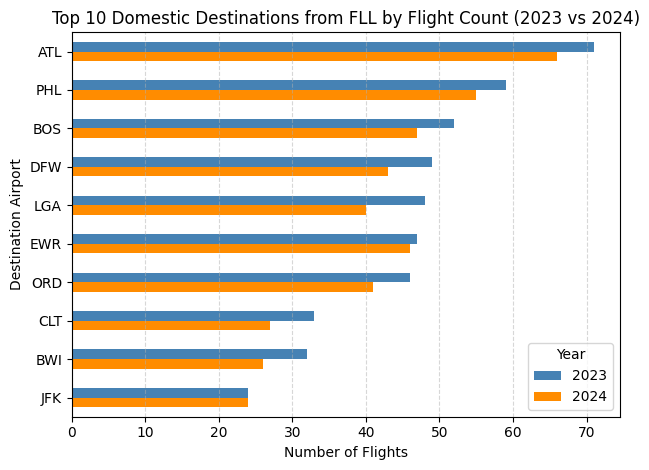

<Figure size 1000x600 with 0 Axes>

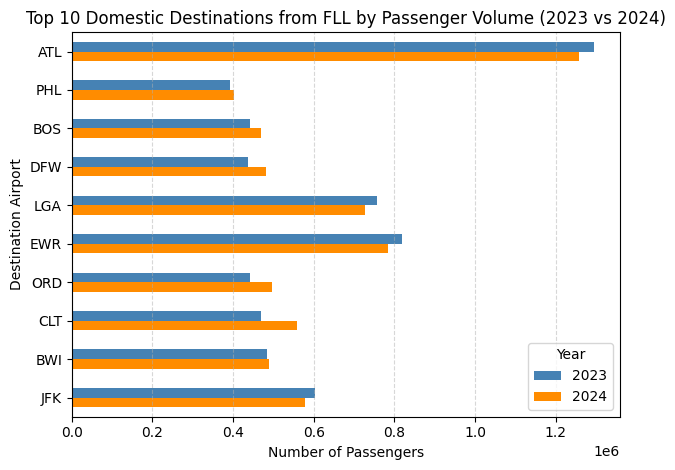

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# ËØªÂèñ T100 Êï∞ÊçÆ
t100_df = pd.read_csv("T100.csv")

# ‰ªÖ‰øùÁïô FLL Âá∫Âèë„ÄÅÂõΩÂÜÖËà™ÊÆµ„ÄÅÂπ¥‰ªΩ‰∏∫ 2023 Êàñ 2024
df = t100_df[
    (t100_df["ORIGIN"] == "FLL") &
    (t100_df["YEAR"].isin([2023, 2024]))   # ÊàñÊ†πÊçÆ‰Ω†Êï∞ÊçÆ‰∏≠ÊòØÂê¶Â≠òÂú®‚ÄúINTERNATIONAL‚ÄùÂ≠óÊÆµËøõË°åÁ≠õÈÄâ
].copy()

# ÁªüËÆ°ÊØèÂπ¥ÊØè‰∏™ÁõÆÁöÑÂú∞ÁöÑËà™Áè≠Êï∞Èáè‰∏éÊóÖÂÆ¢‰∫∫Êï∞
summary = (
    df.groupby(["YEAR", "DEST"])
    .agg(
        flights=("PASSENGERS", "count"),
        passengers=("PASSENGERS", "sum")
    )
    .reset_index()
)

# Âèñ 2023 Âπ¥ÊóÖÂÆ¢‰∫∫Êï∞ÊúÄÂ§öÁöÑÂâç 10 ‰∏™ÁõÆÁöÑÂú∞
top10_dest_2023 = (
    summary[summary["YEAR"] == 2023]
    .nlargest(10, "passengers")["DEST"]
    .tolist()
)

# ‰ªÖ‰øùÁïôÂâçÂçÅÁõÆÁöÑÂú∞
summary_top10 = summary[summary["DEST"].isin(top10_dest_2023)].copy()

# Pivot
pivot_flights = summary_top10.pivot(index="DEST", columns="YEAR", values="flights").fillna(0)
pivot_passengers = summary_top10.pivot(index="DEST", columns="YEAR", values="passengers").fillna(0)

# ‚úÖ ÊéíÂ∫èÔºöÊåâÁÖß 2023 Âπ¥Ëà™Áè≠Êï∞‰ªéÂ§ßÂà∞Â∞èÊéíÂ∫èÔºà‰∏ä ‚Üí ‰∏ãÔºâ
sorted_dest_order = pivot_flights[2023].sort_values(ascending=False).index
pivot_flights = pivot_flights.loc[sorted_dest_order]
pivot_passengers = pivot_passengers.loc[sorted_dest_order]

# ÂèØËßÜÂåñÔºöËà™Áè≠Êï∞Èáè
plt.figure(figsize=(10, 6))
pivot_flights.plot(kind="barh", color=["steelblue", "darkorange"])
plt.title("Top 10 Domestic Destinations from FLL by Flight Count (2023 vs 2024)")
plt.xlabel("Number of Flights")
plt.ylabel("Destination Airport")
plt.legend(title="Year")
plt.gca().invert_yaxis()  # ‚úÖ ÂÖ≥ÈîÆÔºöËÆ©ÊúÄÂ§ßÂÄºÂú®ÊúÄ‰∏äÈù¢
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÂèØËßÜÂåñÔºöÊóÖÂÆ¢Êï∞ÈáèÔºàÊéíÂ∫è‰∏éËà™Áè≠‰øùÊåÅ‰∏ÄËá¥Ôºâ
plt.figure(figsize=(10, 6))
pivot_passengers.plot(kind="barh", color=["steelblue", "darkorange"])
plt.title("Top 10 Domestic Destinations from FLL by Passenger Volume (2023 vs 2024)")
plt.xlabel("Number of Passengers")
plt.ylabel("Destination Airport")
plt.legend(title="Year")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- **‚úàÔ∏è Top 10 Domestic Destinations from FLL (by Flight Count) ‚Äì 2023 vs 2024 (Figure 1)**

    The horizontal clustered bar chart above presents the **top 10 domestic destinations from FLL**, selected based on **2023 flight volume**, and compared with 2024 data for the same destinations.

    **Key Insights:**
    - **ATL (Atlanta)** remains the busiest domestic route from FLL, with a slight decrease in 2024 yet still leading all destinations.
    - **PHL (Philadelphia)** and **BOS (Boston)** maintain strong positions with consistent flight frequency year over year.
    - Some routes like **LGA** and **EWR** saw modest reductions in 2024, possibly due to schedule adjustments or load factor optimization.
    - **JFK**, despite being a major hub, remains at the lower end of the top 10‚Äîlikely due to airline concentration at other NYC airports.

    **Strategic Implications:**
    - Understanding which routes retain or lose volume year-over-year supports decisions on:
    - **Slot allocation**
    - **Terminal utilization**
    - **Carrier negotiations**
    - These insights are essential for FLL to maintain competitive relevance among regional hubs.

    > üìä A similar view by **passenger volume** can help validate whether reduced flights are offset by increased capacity or load factors.

- **üß≥ Top 10 Domestic Destinations from FLL (by Passenger Volume) ‚Äì 2023 vs 2024 (Figure 2)**

    The chart above illustrates the **passenger volume** to the top 10 domestic destinations from Fort Lauderdale (FLL), based on the **2023 ranking by flight count**, and compares it with 2024 figures.

    **Key Observations:**
    - **ATL (Atlanta)** leads not only in flight frequency but also in total passenger volume, maintaining strong demand across both years.
    - **LGA (LaGuardia)** and **EWR (Newark)** demonstrate high passenger loads relative to their flight counts, possibly reflecting larger aircraft or higher load factors.
    - Some markets‚Äîsuch as **CLT** and **DFW**‚Äîshow modest growth in 2024 passenger volume despite flat or reduced flight frequency, suggesting **improved seat utilization**.
    - Most routes remain relatively stable, indicating sustained demand in FLL's top domestic markets.

    **Strategic Takeaways:**
    - Comparing **passenger growth vs. flight growth** reveals where carriers may be increasing efficiency or adjusting capacity.
    - Routes with rising passengers but flat flight count may warrant **slot prioritization or terminal resource adjustment**.
    - Understanding route-level demand dynamics is key to **gate planning, staffing, and long-term air service development**.

    > ‚úàÔ∏è Combined with delay, yield, or carrier data, this view supports route-level profitability and scheduling strategy.



# **Part 4 - Model with Passenger**

### üîÆ Forecasting Monthly Passenger Volume at FLL Using SARIMA

This section presents a time series forecasting model designed to estimate future **monthly passenger volume** departing from Fort Lauderdale-Hollywood International Airport (**FLL**), based on historical data from **2021 to 2024**.



### üìå Modeling Objective & Logic

The goal is to build a statistically sound model that can capture both the **trend** and **seasonal patterns** in passenger traffic and provide **short-term forecasts** (e.g., for 2024), enabling proactive planning in airport operations.

We adopt the **SARIMA (Seasonal ARIMA)** framework, which is well-suited for capturing:
- Regular trend growth or decay (via differencing),
- Seasonal fluctuations (monthly seasonality),
- Correlated residuals (autoregressive and moving average components).



### üß∞ Key Steps in the Modeling Pipeline

- **Step 1**: Load monthly FLL departure passenger data from the **T100 dataset**, spanning 2021‚Äì2024.
- **Step 2**: Aggregate total passengers by month and convert to a `datetime` index.
- **Step 3**: Split the dataset:
  - Training: data before **2024-01**
  - Testing: data from **2024 onward** (for forecast evaluation)
- **Step 4**: Apply **log transformation** to stabilize variance and suppress exponential growth patterns.
- **Step 5**: Fit a SARIMA(1,1,1)(1,1,1,12) model to the log-transformed training data.
- **Step 6**: Forecast monthly passenger volume for 2024, then apply exponential transformation to revert predictions to the original scale.
- **Step 7**: Visualize forecasted values alongside actual 2024 data, including confidence intervals.



This approach supports **capacity planning**, **seasonal staffing**, and **infrastructure readiness** by providing month-level demand estimates grounded in historical behavior.


## **Build and Test**

C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Use

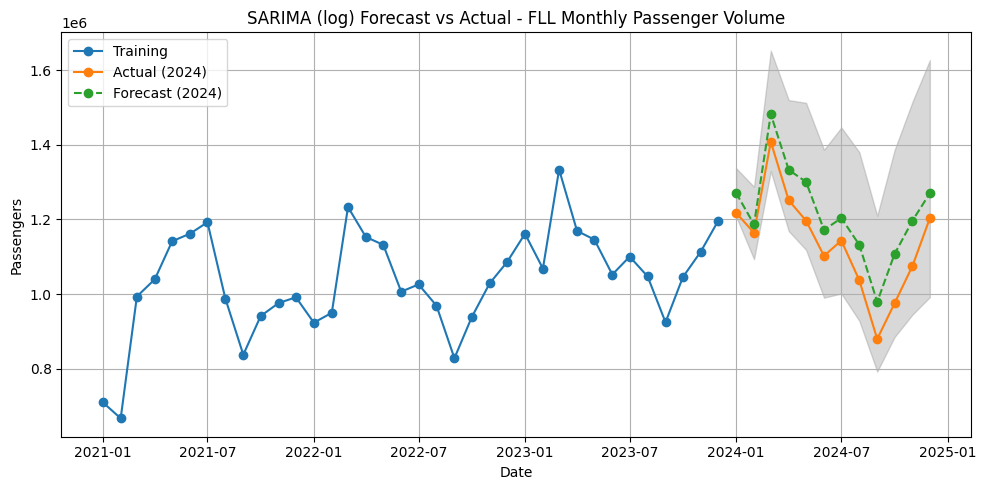

Actual     Predicted      Lower_CI      Upper_CI
2024-01-01  1217932.0  1.271345e+06  1.208332e+06  1.337643e+06
2024-02-01  1164258.0  1.186696e+06  1.093662e+06  1.287644e+06
2024-03-01  1408139.0  1.482135e+06  1.329600e+06  1.652169e+06
2024-04-01  1251302.0  1.332911e+06  1.168920e+06  1.519908e+06
2024-05-01  1196894.0  1.300752e+06  1.118638e+06  1.512513e+06
2024-06-01  1102527.0  1.172036e+06  9.906545e+05  1.386627e+06
2024-07-01  1143615.0  1.203639e+06  1.001571e+06  1.446475e+06
2024-08-01  1037251.0  1.132147e+06  9.286274e+05  1.380271e+06
2024-09-01   879932.0  9.793097e+05  7.925854e+05  1.210024e+06
2024-10-01   975413.0  1.107512e+06  8.851508e+05  1.385734e+06
2024-11-01  1075630.0  1.196877e+06  9.452770e+05  1.515444e+06
2024-12-01  1203373.0  1.270428e+06  9.921068e+05  1.626829e+06

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. ËØªÂèñÊï∞ÊçÆ
t100_df = pd.read_csv("T100.csv")

# 2. ÊûÑÂª∫ FLL ÊúàÂ∫¶Êó∂Èó¥Â∫èÂàóÔºà2021‚Äì2024Ôºâ
t100_fll = t100_df[
    (t100_df["ORIGIN"] == "FLL") &
    (t100_df["YEAR"].isin([2021, 2022, 2023, 2024]))
].copy()

t100_fll["Date"] = pd.to_datetime(t100_fll["YEAR"].astype(str) + "-" + t100_fll["MONTH"].astype(str) + "-01")
monthly_series = (
    t100_fll.groupby("Date")["PASSENGERS"]
    .sum()
    .sort_index()
)

# 3. ÊãÜÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜ
train_series = monthly_series[monthly_series.index < "2024-01-01"]
test_series = monthly_series[monthly_series.index >= "2024-01-01"]

# ‚úÖ 4. ÂØπËÆ≠ÁªÉÈõÜÂèñÂØπÊï∞ÔºåÈÅøÂÖçË∂ãÂäøÂ§ñÊé®ÊîæÂ§ß
train_log = np.log(train_series)

# 5. Âª∫Ê®° + ÊãüÂêà
model = SARIMAX(
    train_log,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# 6. È¢ÑÊµãÂπ∂ËøòÂéüÊåáÊï∞
forecast_log = model.get_forecast(steps=len(test_series))
forecast_mean_log = forecast_log.predicted_mean
forecast_ci_log = forecast_log.conf_int()

# ËøòÂéü‰∏∫‰πòÂÆ¢Êï∞Èáè
forecast_mean = np.exp(forecast_mean_log)
forecast_ci_lower = np.exp(forecast_ci_log.iloc[:, 0])
forecast_ci_upper = np.exp(forecast_ci_log.iloc[:, 1])

# 7. Êï¥ÂêàÈ¢ÑÊµãÁªìÊûú
results_df = pd.DataFrame({
    "Actual": test_series,
    "Predicted": forecast_mean,
    "Lower_CI": forecast_ci_lower,
    "Upper_CI": forecast_ci_upper
})

# 8. ÂèØËßÜÂåñÂØπÊØî
plt.figure(figsize=(10, 5))
plt.plot(train_series.index, train_series, label="Training", marker='o')
plt.plot(test_series.index, test_series, label="Actual (2024)", marker='o')
plt.plot(forecast_mean.index, forecast_mean, label="Forecast (2024)", linestyle='--', marker='o')
plt.fill_between(forecast_mean.index, forecast_ci_lower, forecast_ci_upper, color='gray', alpha=0.3)

plt.title("SARIMA (log) Forecast vs Actual - FLL Monthly Passenger Volume")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. ËæìÂá∫ÁªìÊûú
results_df


### üìä SARIMA Forecast Performance Overview (2024)

The chart above compares the SARIMA model‚Äôs **forecasted monthly passenger volume** for 2024 with actual data observed at FLL.

#### Legend:
- **Blue Line**: Historical training data (2021‚Äì2023)
- **Orange Line**: Actual 2024 passenger volumes (test set)
- **Green Dashed Line**: Forecasted values for 2024
- **Gray Band**: 95% confidence interval around forecast


### üîç Interpretation:
- The model effectively captures the **seasonal wave structure** in FLL traffic, including the **peak in Q1** and the **summer dip**, consistent with observed trends.
- In some months (e.g., May‚ÄìAugust), the actual passenger volume fell below the lower bound of the forecast interval, possibly due to **operational constraints**, **route shifts**, or **demand-side changes** (e.g., economic softening or airline schedule cuts).
- The model slightly overestimated mid-year demand but remained **within reasonable bounds**, particularly for a log-transformed seasonal model.


### üßæ Takeaway:
Despite minor variances, the SARIMA model offers **reasonable predictive power** and can serve as a **baseline forecasting tool** for:
- Monthly **capacity planning**
- **Budget forecasts** tied to traffic volume
- Identifying anomalies for future investigations (e.g., underperformance)

> ‚úàÔ∏è Future improvements may include incorporating **exogenous variables (SARIMAX)** such as fuel prices, events, or macro indicators to enhance accuracy.


## **Predict**

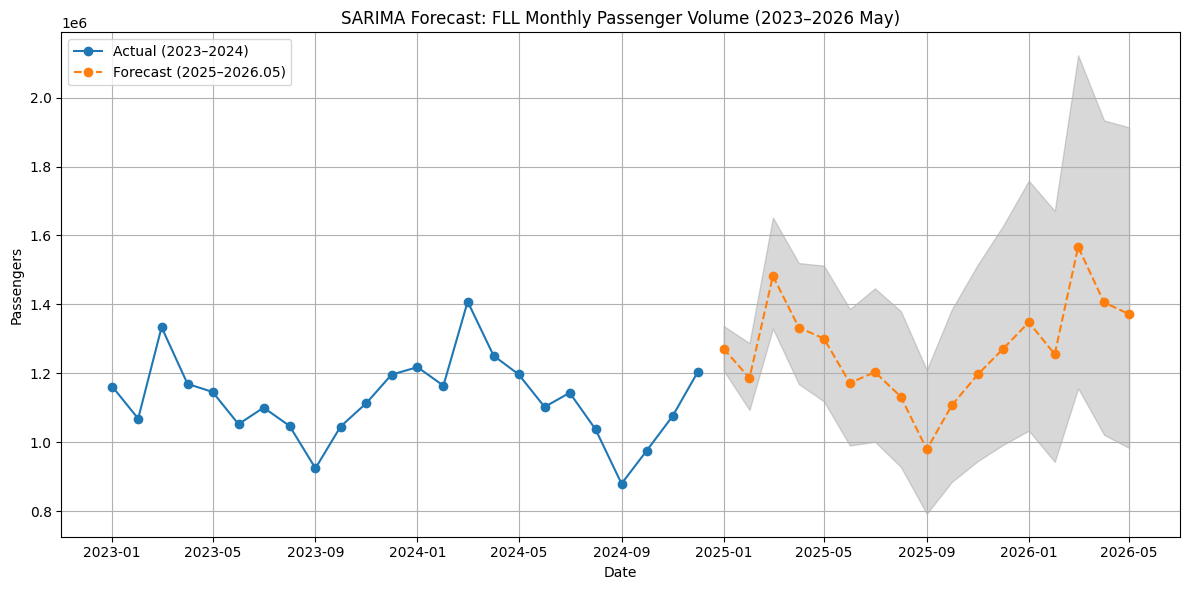

Date  Forecasted_Passengers      Lower_CI      Upper_CI
0  2025-01-01           1.271345e+06  1.208332e+06  1.337643e+06
1  2025-02-01           1.186696e+06  1.093662e+06  1.287644e+06
2  2025-03-01           1.482135e+06  1.329600e+06  1.652169e+06
3  2025-04-01           1.332911e+06  1.168920e+06  1.519908e+06
4  2025-05-01           1.300752e+06  1.118638e+06  1.512513e+06
5  2025-06-01           1.172036e+06  9.906545e+05  1.386627e+06
6  2025-07-01           1.203639e+06  1.001571e+06  1.446475e+06
7  2025-08-01           1.132147e+06  9.286274e+05  1.380271e+06
8  2025-09-01           9.793097e+05  7.925854e+05  1.210024e+06
9  2025-10-01           1.107512e+06  8.851508e+05  1.385734e+06
10 2025-11-01           1.196877e+06  9.452770e+05  1.515444e+06
11 2025-12-01           1.270428e+06  9.921068e+05  1.626829e+06
12 2026-01-01           1.348196e+06  1.033523e+06  1.758676e+06
13 2026-02-01           1.255445e+06  9.431218e+05  1.671195e+06
14 2026-03-01           1.566821e+06  1.156524e+06  2.122679e+06
15 2026-04-01           1.405571e+06  1.021667e+06  1.933732e+06
16 2026-05-01           1.371784e+06  9.834444e+05  1.913470e+06

In [18]:
# ‰ΩøÁî®Áé∞ÊúâÊ®°ÂûãÈ¢ÑÊµã 2025Âπ¥1ÊúàÂà∞2026Âπ¥5ÊúàÔºàÂÖ±17‰∏™ÊúàÔºâ
forecast_extended_log = model.get_forecast(steps=17)
forecast_mean_log = forecast_extended_log.predicted_mean
forecast_ci_log = forecast_extended_log.conf_int()

# ËøòÂéü‰∏∫‰πòÂÆ¢Êï∞Èáè
forecast_mean = np.exp(forecast_mean_log)
forecast_lower = np.exp(forecast_ci_log.iloc[:, 0])
forecast_upper = np.exp(forecast_ci_log.iloc[:, 1])

# ÁîüÊàêÈ¢ÑÊµãÊó∂Èó¥Á¥¢ÂºïÔºà‰ªé 2025-01 ÂºÄÂßãÔºåËøûÁª≠17‰∏™ÊúàÔºâ
start_date = pd.to_datetime("2025-01-01")
forecast_index = pd.date_range(start=start_date, periods=17, freq="MS")

# ÊûÑÂª∫ DataFrame
forecast_extended_df = pd.DataFrame({
    "Date": forecast_index,
    "Forecasted_Passengers": forecast_mean.values,
    "Lower_CI": forecast_lower.values,
    "Upper_CI": forecast_upper.values
})

# Ëé∑Âèñ 2023‚Äì2024 ÁöÑÂÆûÈôÖÊï∞ÊçÆÁî®‰∫éÂèÇËÄÉ
recent_actual = monthly_series[monthly_series.index >= "2023-01-01"]

# ÂèØËßÜÂåñ
plt.figure(figsize=(12, 6))
plt.plot(recent_actual.index, recent_actual.values, label="Actual (2023‚Äì2024)", marker='o')
plt.plot(forecast_extended_df["Date"], forecast_extended_df["Forecasted_Passengers"], label="Forecast (2025‚Äì2026.05)", linestyle='--', marker='o')
plt.fill_between(
    forecast_extended_df["Date"],
    forecast_extended_df["Lower_CI"],
    forecast_extended_df["Upper_CI"],
    color='gray', alpha=0.3
)

plt.title("SARIMA Forecast: FLL Monthly Passenger Volume (2023‚Äì2026 May)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ËæìÂá∫È¢ÑÊµãË°®Ê†º
forecast_extended_df


### üìà SARIMA Forecast: FLL Monthly Passenger Volume (2025‚Äì2026.05 Extension)

This forecast extends the SARIMA model projection beyond the evaluation period, offering a **17-month forward forecast** into **2025 and early 2026**, based on training from historical data (2021‚Äì2023) and validated on 2024 trends.

#### Visual Guide:
- **Blue Line**: Actual historical data (2023‚Äì2024)
- **Orange Dashed Line**: Forecasted passenger volume (Jan 2025 ‚Äì May 2026)
- **Shaded Area**: 95% confidence interval



### üîç Interpretation of Forecast Trends:
- Passenger volume is expected to maintain a **strong seasonal pattern**, with anticipated peaks in **March 2025** and **January 2026**‚Äîmatching typical winter/spring travel surges at FLL.
- The forecast captures **low points** in the late summer months (e.g., September 2025), consistent with past years.
- Widening confidence bands in 2026 reflect **greater uncertainty** due to longer forecast horizons, as expected in statistical time series models.



### üìä Use Case and Strategic Value:
- This forward-looking passenger projection can support:
- **Staffing and resource scheduling** (e.g., TSA, baggage handlers, customs)
- **Gate allocation and seasonal slot planning**
- **Commercial and concession revenue modeling**
- Airports and airlines can also use this to **test operational scenarios**, such as service expansion, aircraft swaps, or disruptions.




# **Part 5 - Model with Depature Delay**

## Flight Delay Prediction Model: Overview and Workflow

This notebook presents a supervised classification model designed to predict whether a departing flight from FLL (Fort Lauderdale-Hollywood International Airport) will experience a delay of more than 15 minutes (`DEP_DEL15 = 1`). The modeling process strictly follows temporal integrity and prioritizes interpretability and operational usability.

---

### üéØ Modeling Objective
- Task: Binary classification
- Target: `DEP_DEL15` (1 = delayed departure >15 min)
- Optimization goal: **Maximize recall of delayed flights (class 1)**

---

### üß† Modeling Strategy Summary

1. **Time-based Data Split (No Leakage):**
   - Use data **before June 2024** for training & validation
   - Use data **from June 2024 onward** for final testing
   - Within the training set:
     - `train_train`: flights before May 2024
     - `train_valid`: flights from May 2024 (for manual hyperparameter tuning)
     - `test`: flights from June 2024 (unseen data for evaluation)  





2. **Handling Class Imbalance:**
   - Use `scale_pos_weight` in XGBoost to counter under-representation of delayed flights

3. **Feature Engineering:**
   - `DEP_TIME_BIN`: Time-of-day bucket for departure hour
   - `AGE_BIN`: Aircraft age group
   - `WIND_BIN`: Wind speed level (low / medium / high)
   - `IS_SUMMER`: Binary flag for peak summer months
   - `IS_WEEKEND`: Binary flag for weekend departures

4. **Preprocessing + Modeling Pipeline:**
   - Categorical features encoded via OneHotEncoder
   - Numerical features passed through directly
   - Combined using `ColumnTransformer` and wrapped into a `Pipeline`
   - Classifier: `XGBClassifier` from XGBoost library

5. **Manual Hyperparameter Search:**
   - Avoid `GridSearchCV` to preserve time structure
   - Manually evaluate different parameter combinations
   - **Validation metric: `recall_score` (class 1)**  
      In this context, maximizing the recall for class 1 (i.e., delayed flights) is a critical goal. Here's why:

      - **Operational Importance**:  
         A missed detection of a delayed flight (false negative) can have downstream consequences‚Äîsuch as inefficient gate assignments, passenger mismanagement, and resource disruptions. By maximizing recall, we aim to **identify as many truly delayed flights as possible**.

      - **Tolerance for False Positives**:  
         While high precision is ideal, in operational scenarios it's often more acceptable to **flag some on-time flights as potentially delayed (false positives)** than to miss true delays. Early warnings can trigger proactive measures, such as preparing for potential delays, even if not all flagged cases eventually experience them.

      - **Strategic Tradeoff**:  
         By prioritizing recall, we explicitly allow a drop in precision and overall accuracy in exchange for **capturing more true delays**, which aligns with the airport or airline‚Äôs risk management goals. The idea is: *‚ÄúIt‚Äôs better to over-warn than to under-detect.‚Äù*


### ‚úÖ Evaluation Metrics
- Use `classification_report` for precision / recall / F1-score
- Final model selected based on **recall on validation set**
- Evaluation conducted on **fully unseen test set** (June 2024 onward)

---


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from collections import Counter

# 1. ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("FLL_data.csv")

#„Äê1„ÄëÊûÑÈÄ†Ëøë 7 Â§©ËØ•ÁõÆÁöÑÂú∞ÁöÑÂª∂ËØØÁéáÔºàÊªëÁ™óÁâπÂæÅÔºâ
# ËøôÊÆµ‰ª£Á†Å‰ºöÂú® ÊØè‰∏™ÁõÆÁöÑÂú∞ DEST ÂÜÖÈÉ®ÔºåËÆ°ÁÆóËøáÂéª 7 Â§©ÔºàÂê´ÂΩìÂ§©ÔºâÁöÑ DEP_DEL15 Âπ≥ÂùáÂÄº‰Ωú‰∏∫Âª∂ËØØÁéáÔºö
# Á°Æ‰øù FL_DATE ÂçáÂ∫èÊéíÂ∫è
df = df.sort_values(by=["DEST", "FL_DATE"])

#„Äê2„ÄëÂä†ÂÖ•ÁªìÊûÑÊÄßËäÇÂÅáÊó•/È´òÂ≥∞ÂèòÈáè
# ÊòØÂê¶Â§èÂ≠£È´òÂ≥∞Êúà
df['IS_SUMMER'] = df['MONTH'].isin([6, 7, 8]).astype(int)

# ÊòØÂê¶Âë®Êú´
df['IS_WEEKEND'] = df['DAY_OF_WEEK'].isin([6, 7]).astype(int)



# ÂàÜÁÆ±ÂáΩÊï∞
def bin_crs_dep_time(x):
    if pd.isna(x): return "Unknown"
    hour = int(x // 100)
    if hour < 6: return "Night"
    elif hour < 12: return "Morning"
    elif hour < 18: return "Afternoon"
    else: return "Evening"

def bin_age_flight(x):
    if pd.isna(x): return "Unknown"
    elif x <= 2: return "0-2yrs"
    elif x <= 7: return "3-7yrs"
    else: return "8+yrs"

def bin_windspd(x):
    if pd.isna(x): return "Unknown"
    elif x <= 5: return "Low"
    elif x <= 15: return "Medium"
    else: return "High"

# Â∫îÁî®ÂàÜÁÆ±
df["DEP_TIME_BIN"] = df["CRS_DEP_TIME"].apply(bin_crs_dep_time)
df["AGE_BIN"] = df["AGE_FLIGHT"].apply(bin_age_flight)
df["WIND_BIN"] = df["WindSpd"].apply(bin_windspd)


# ÁâπÂæÅ‰∏éÁõÆÊ†á
features = [
    'DAY_OF_WEEK', 'MONTH', 'QUARTER', 'DEST', 'OP_UNIQUE_CARRIER', 'MODEL',
    'DEP_TIME_BIN', 'AGE_BIN', 'WIND_BIN',
    'DISTANCE', 'Prec', 'Gust', 'WindDir', 'Temp', 'Vis'
]
target = 'DEP_DEL15'

# ‰øùÁïôÊúâÊïàÊï∞ÊçÆ + Êó∂Èó¥Â≠óÊÆµ
df = df[features + [target, 'FL_DATE']].copy()
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# ÂàíÂàÜÊï∞ÊçÆÈõÜ
train_full = df[df['FL_DATE'] < "2024-06-01"]
test_df    = df[df['FL_DATE'] >= "2024-06-01"]

train_train_df = train_full[train_full['FL_DATE'] < "2024-05-01"]
train_valid_df = train_full[train_full['FL_DATE'].dt.month == 5]

# Ê∏ÖÊ¥óÂêÑÂ≠êÈõÜ
def clean_data(sub_df):
    clean = sub_df.dropna(subset=[target] + features).copy()
    return clean[clean[target].isin([0, 1])]

train_train_df = clean_data(train_train_df)
train_valid_df = clean_data(train_valid_df)
test_df = clean_data(test_df)

X_train_train = train_train_df[features]
y_train_train = train_train_df[target]

X_valid = train_valid_df[features]
y_valid = train_valid_df[target]

X_test = test_df[features]
y_test = test_df[target]

# È¢ÑÂ§ÑÁêÜ
categorical_cols = ['DAY_OF_WEEK', 'MONTH', 'QUARTER', 'DEST', 'OP_UNIQUE_CARRIER', 'MODEL', 'DEP_TIME_BIN', 'AGE_BIN', 'WIND_BIN']
numeric_cols = [col for col in features if col not in categorical_cols]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])

# Á±ªÂà´ÊùÉÈáç
class_counts = Counter(y_train_train)
neg, pos = class_counts[0.0], class_counts[1.0]
scale_pos_weight = neg / pos

# ‰Ω†‰πãÂâçËÆ°ÁÆóÁöÑÂü∫Á°ÄÊùÉÈáç
base_weight = scale_pos_weight  # = neg / pos

# Êâ©Â±ïÂèÇÊï∞ÁªÑ
param_sets = [
    {"n_estimators": 100, "max_depth": 10, "learning_rate": 0.1, "scale_pos_weight": base_weight},
    {"n_estimators": 150, "max_depth": 10, "learning_rate": 0.05, "scale_pos_weight": base_weight * 1.5},
    {"n_estimators": 200, "max_depth": 10, "learning_rate": 0.1, "scale_pos_weight": base_weight * 2},
    {"n_estimators": 300, "max_depth": 10, "learning_rate": 0.05, "scale_pos_weight": base_weight * 3},
]


# ÊâãÂä®ÊêúÁ¥¢Ë∞ÉÂèÇ
# ÊâãÂä®ÊêúÁ¥¢Ë∞ÉÂèÇÔºà‰ª• recall ‰∏∫ÈÄâÊã©ÊåáÊ†áÔºâ
best_model = None
best_recall = 0
from sklearn.metrics import recall_score

for i, params in enumerate(param_sets):
    clf = Pipeline([
        ('prep', preprocessor),
        ('xgb', XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss',
            use_label_encoder=False,
            random_state=42,
            **params  # ËøôÈáåÂ∑≤ÁªèÂåÖÂê´ scale_pos_weight
        ))
    ])

    clf.fit(X_train_train, y_train_train)
    y_val_pred = clf.predict(X_valid)
    recall = recall_score(y_valid, y_val_pred)

    print(f"Param set {i+1}: {params} | Recall (class 1) on validation = {recall:.4f}")

    if recall > best_recall:
        best_recall = recall
        best_model = clf


# ‚úÖ Áî®ÊúÄ‰Ω≥Ê®°ÂûãÂú® test Êï∞ÊçÆÈõÜ‰∏äËØÑ‰º∞
y_test_pred = best_model.predict(X_test)
print("\nüìä Final evaluation on TEST set:")
print(classification_report(y_test, y_test_pred))


C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:04:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:04:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Param set 1: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'scale_pos_weight': 1.7850678733031675} | Recall (class 1) on validation = 0.6000
Param set 2: {'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.05, 'scale_pos_weight': 2.6776018099547514} | Recall (class 1) on validation = 0.6222


C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:04:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:04:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Param set 3: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'scale_pos_weight': 3.570135746606335} | Recall (class 1) on validation = 0.6667
Param set 4: {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'scale_pos_weight': 5.355203619909503} | Recall (class 1) on validation = 0.7111

üìä Final evaluation on TEST set:
              precision    recall  f1-score   support

         0.0       0.79      0.58      0.67      2407
         1.0       0.33      0.57      0.42       871

    accuracy                           0.58      3278
   macro avg       0.56      0.58      0.54      3278
weighted avg       0.67      0.58      0.60      3278



- üßæ Summary of Model Performance and Operational Value  
The final model achieved a recall of 57% for delayed flights (class 1) on the June 2024 test dataset. This indicates that the model was able to successfully identify over half of the truly delayed departures at FLL, which is a meaningful gain over random guessing or traditional rule-based alert systems.

- Although the overall accuracy (58%) and precision for delayed cases (33%) appear moderate, this tradeoff is intentional and justified:

    - Operationally Targeted:  
    The model was specifically optimized to maximize recall for delayed flights, as missing a delay (false negative) could lead to missed resource preparations, inefficient gate usage, and passenger dissatisfaction.
    The system now captures significantly more real delays, offering earlier warnings to staff.

    - Actionability over Perfection:  
    The model is designed to support operations, not to replace judgment. A 57% recall means frontline staff will be alerted for most delays, enabling proactive mitigation (e.g., reassigning gates, updating signage, deploying standby crew), even if some alerts are false positives.

    - Deployable & Transparent:  
    The model uses structured features such as scheduled departure time bins, aircraft age, weather categories, and flight metadata‚Äîall of which are interpretable and operationally meaningful. This ensures explainability and ease of integration into dashboard alerts or resource planning systems.